# Исследование продаж компьютерных игр


**Автор:**  

Григорьев Павел


**Описание проекта:**   

Интернет-магазин 'Стримчик' разрабатывает стратегию на 2017 год для повышения продаж компьютерных игр, основываясь на анализе исторических данных о продажах, оценках пользователей и экспертов, жанрах и платформах. Анализ позволит выявить закономерности, которые помогут определить потенциально популярные продукты и эффективно спланировать рекламные кампании.

**Цель:**  

Определить ключевые факторы, влияющие на успешность продаж компьютерных игр, установить взаимосвязи между ними и объемами продаж,   
а также проанализировать изменения этих показателей в зависимости от платформ, регионов продвижения и исторического периода.

**Источники данных:**  

Исторические данные из открытых источников о продажах игр, включая оценки пользователей и экспертов, а также информацию о жанрах и платформах.

**Главные выводы:**  
тут помещаем самое главное из общего вывода, примерно до полустраницы, чтобы не было сильно много и при этом указать все главные выводы
Будет идеально, елси выводы на похожие темы будут рядом, то есть елси мы имеем несколько выводов о доходе, то лушче поместить их рядом

- Женщины чаще возвращают кредит, чем мужчины.
- Долги присутствуют у людей с разным доходом.


**Аномалии и особенности в данных:**

- В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.
- В столбце с количеством детей есть отрицательные значения. 47 штук. Меньше 1 процента от всего датафрейма. Также есть клиенты с 20 детьми.


**Рекомендации:**

- Добавить контроль данных, чтобы не дублировались значения с разными регистрами в колонке с образованием.
- Добавить уникальный идентификатор клиента, чтобы избежать дублирования строк.


## Загрузка библиотек <skip>

In [641]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import plotly.express as px
import pagri_data_tools  # type: ignore
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Описание и изучение данных


### Описание данных


- Name - название игры
- Platform - платформа
- Year_of_Release - год выпуска
- Genre - жанр игры
- NA_sales - продажи в Северной Америке (миллионы проданных копий)
- EU_sales - продажи в Европе (миллионы проданных копий)
- JP_sales - продажи в Японии (миллионы проданных копий)
- Other_sales - продажи в других странах (миллионы проданных копий)
- Critic_Score - оценка критиков (максимум 100)
- User_Score - оценка пользователей (максимум 10)
- Rating - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Изучение данных


#### Изучение переменных


Загружаем данные и задаем типы данных для столбцов, где это возможно.

In [642]:
dtype = {'Platform': 'category', 'Genre': 'category', 'Rating': 'category'}
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', dtype=dtype)
df.sample(5, random_state=7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
12182,FIFA Soccer 06,GBA,"2,005.00",Sports,0.05,0.02,0.00,0.00,NaN,tbd,E
7100,Buzz! Junior: RoboJam,PS2,"2,007.00",Misc,0.11,0.09,0.00,0.03,NaN,NaN,NaN
16385,Kamaitachi no Yoru 2: Tokubetsu Hen,PSP,"2,006.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
12356,Tonka Rescue Patrol,GC,"2,003.00",Action,0.05,0.01,0.00,0.00,NaN,NaN,NaN


Приведем названия колонок к нижнему регистру.


In [643]:
df.columns = [col.lower() for col in df.columns]

Столбец с оценками пользователей имеет тип object. Это странно. Изучим для начала этот столбец.

Values,10 014 (60%),,tbd (24%)
Missing,6 701 (40%),,7.8 (3%)
Distinct,96 (1%),,8 (3%)
Duplicated origin,16 618 (99.4%),,8.2 (3%)
Dupl (modify - origin),---,,8.3 (3%)
Empty,---,,8.5 (3%)
RAM (Mb),1,,7.5 (3%)

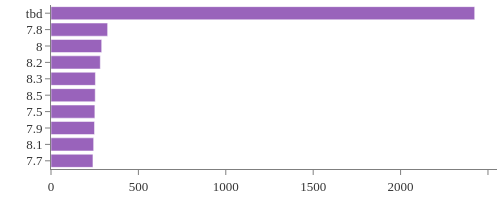

In [644]:
gen = pagri_data_tools.info_gen(df, column='user_score', mode='column')
gen.next()

**Наблюдения:**  

- Есть странное значение tbd, которое не является числом. И таких значений 24 %.

tbd означает "to be determined" - "будет определено позже"  
Так как нам нужен этот столбец в числовом виде, то заменим tbd на na. И зменим тип данных на числовой.

In [645]:
df.user_score.isna().sum()

np.int64(6701)

In [646]:
(df.user_score == 'tbd').sum()

np.int64(2424)

In [647]:
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'])

In [648]:
df.user_score.isna().sum()

np.int64(9125)

In [649]:
(df.user_score == 'tbd').sum()

np.int64(0)

Изучим каждый столбец отдельно.

In [650]:
gen = pagri_data_tools.info_gen(df)
gen.next()

Rows,Features,RAM (Mb),Duplicates,Dupl (sub - origin)
16 715,11,2,---,---


Values,16 446 (98%),,Max,2 016,,Avg,2 006.48,,2 008 (9%)
Missing,269 (2%),,95%,2 015,,Mode,2 008,,2 009 (9%)
Distinct,37 (<1%),,75%,2 010,,Range,36,,2 010 (8%)
Duplicates,16 677 (99.8%),,Median,2 007,,iQR,7,,2 007 (7%)
Zeros,---,,25%,2 003,,std,5.88,,2 011 (7%)
Negative,---,,5%,1 996,,kurt,1.77,,2 006 (6%)
RAM (Mb),<1 Mb,,Min,1 980,,skew,-0.97,,2 005 (6%)

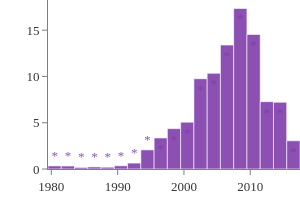

In [651]:
gen.next()

**Наблюдения:**  

- Игры имеют год выпуска от 1980 до 2016 года.
- Основная часть игр имеет год выпуска от 2003 до 2010 года.
- Больше всего игр 2008 года.
- В столбце с годом выпуска 2 % пропусков.

Values,16 715 (100%),,Max,41.36,,Avg,0.26,,0 (27%)
Missing,---,,95%,1.06,,Mode,0,,0.02 (3%)
Distinct,402 (2%),,75%,0.24,,Range,41.36,,0.03 (3%)
Duplicates,16 313 (98%),,Median,0.08,,iQR,0.24,,0.04 (3%)
Zeros,4 508 (27%),,25%,0,,std,0.81,,0.01 (3%)
Negative,---,,5%,0,,kurt,648.57,,0.05 (3%)
RAM (Mb),<1 Mb,,Min,0,,skew,18.77,,0.06 (3%)

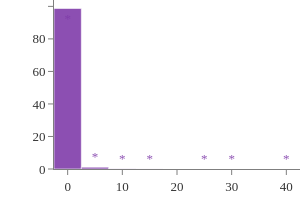
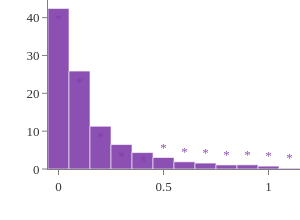

In [652]:
gen.next('dual')

**Наблюдения:**  

- В столбце с продажами в Северной Америке есть нули (27%). По видимому для этих игр не было продаж в Северной Америке.
- Количество проданных игр в Северной Америке лежит в диапазоне от 0 до 41.36 млн.
- В основном количество проданных игр в Северной Америке находится в диапазоне от 0 до 0.24 млн.

Values,16 715 (100%),,Max,28.96,,Avg,0.15,,0 (35%)
Missing,---,,95%,0.62,,Mode,0,,0.01 (9%)
Distinct,307 (2%),,75%,0.11,,Range,28.96,,0.02 (8%)
Duplicates,16 408 (98%),,Median,0.02,,iQR,0.11,,0.03 (6%)
Zeros,5 870 (35%),,25%,0,,std,0.5,,0.04 (4%)
Negative,---,,5%,0,,kurt,755.52,,0.05 (3%)
RAM (Mb),<1 Mb,,Min,0,,skew,18.85,,0.06 (2%)

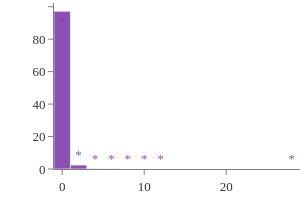
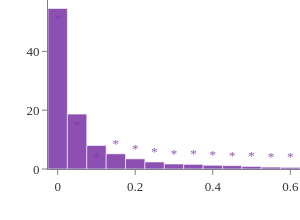

In [653]:
gen.next('dual')

**Наблюдения:**  

- В столбце с продажами в Европе есть нули (35%). По видимому для этих игр не было продаж в Европе.
- Количество проданных игр в Европе лежит в диапазоне от 0 до 28.96 млн.
- В основном количество проданных игр в Европе находится в диапазоне от 0 до 0.11 млн.

Values,16 715 (100%),,Max,10.22,,Avg,0.08,,0 (63%)
Missing,---,,95%,0.36,,Mode,0,,0.02 (4%)
Distinct,244 (1%),,75%,0.04,,Range,10.22,,0.01 (4%)
Duplicates,16 471 (99%),,Median,0,,iQR,0.04,,0.03 (3%)
Zeros,10 514 (63%),,25%,0,,std,0.31,,0.04 (2%)
Negative,---,,5%,0,,kurt,194.27,,0.05 (2%)
RAM (Mb),<1 Mb,,Min,0,,skew,11.21,,0.06 (2%)

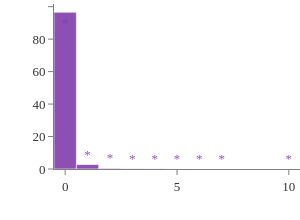
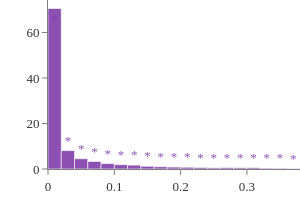

In [654]:
gen.next('dual')

**Наблюдения:**  

- В столбце с продажами в Японии есть нули (63%). По видимому для этих игр не было продаж в Японии.
- Количество проданных игр в Японии лежит в диапазоне от 0 до 10.22 млн.
- В основном количество проданных игр в Японии находится в диапазоне от 0 до 0.4 млн.

Values,16 715 (100%),,Max,10.57,,Avg,0.05,,0 (39%)
Missing,---,,95%,0.2,,Mode,0,,0.01 (21%)
Distinct,155 (1%),,75%,0.03,,Range,10.57,,0.02 (10%)
Duplicates,16 560 (99.1%),,Median,0.01,,iQR,0.03,,0.03 (6%)
Zeros,6 601 (39%),,25%,0,,std,0.19,,0.04 (4%)
Negative,---,,5%,0,,kurt,1054.90,,0.05 (3%)
RAM (Mb),<1 Mb,,Min,0,,skew,24.58,,0.06 (2%)

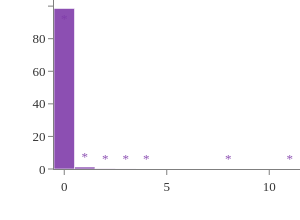
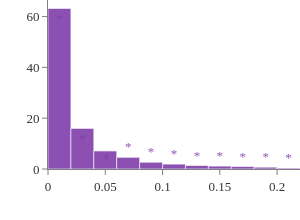

In [655]:
gen.next('dual')

**Наблюдения:**  

- В столбце с продажами в других странах есть нули (39%). По видимому для этих игр не было продаж в других странах.
- Количество проданных игр в других странах лежит в диапазоне от 0 до 10.57 млн.
- В основном количество проданных игр в других странах находится в диапазоне от 0 до 0.03 млн.

Values,8 137 (49%),,Max,98,,Avg,68.97,,70 (3%)
Missing,8 578 (51%),,95%,89,,Mode,70,,71 (3%)
Distinct,82 (<1%),,75%,79,,Range,85,,75 (3%)
Duplicates,16 632 (99.5%),,Median,71,,iQR,19,,78 (3%)
Zeros,---,,25%,60,,std,13.94,,73 (3%)
Negative,---,,5%,43,,kurt,0.14,,80 (3%)
RAM (Mb),<1 Mb,,Min,13,,skew,-0.61,,76 (3%)

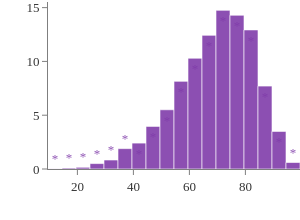

In [656]:
gen.next()

**Наблюдения:**  

- В столбце с оценкой критиков 51% пропущенных занчений.
- Оценка критиков лежит в диапазоне от 13 до 98.
- В основном критики ставят оценки от 60 до 79.

Values,7 590 (45%),,Max,9.7,,Avg,7.13,,7.8 (4%)
Missing,9 125 (55%),,95%,8.9,,Mode,7.8,,8 (4%)
Distinct,95 (1%),,75%,8.2,,Range,9.7,,8.2 (4%)
Duplicates,16 619 (99.4%),,Median,7.5,,iQR,1.8,,8.3 (3%)
Zeros,1 (<1%),,25%,6.4,,std,1.5,,8.5 (3%)
Negative,---,,5%,4.1,,kurt,1.72,,7.5 (3%)
RAM (Mb),<1 Mb,,Min,0,,skew,-1.25,,7.9 (3%)

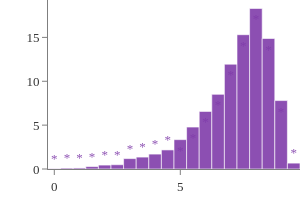

In [657]:
gen.next()

**Наблюдения:**  

- В столбце с оценкой пользователей 55% пропущенных значений.
- Оценка пользователей варируется от 0 до 9.7.
- В освновном пользователи ставят оценки от 6.4 до 8.2
- Значение 0 в оценке пользователей явно является аномалией.

Values,16 713 (99.9%),,Need for Speed: Most Wanted <1%
Missing,2 (<1%),,Ratatouille <1%
Distinct,11 559 (69%),,LEGO Marvel Super Heroes <1%
Duplicated origin,5 155 (31%),,FIFA 14 <1%
Dupl (modify - origin),2 (<1%),,Madden NFL 07 <1%
Empty,---,,LEGO The Hobbit <1%
RAM (Mb),1,,FIFA Soccer 13 <1%

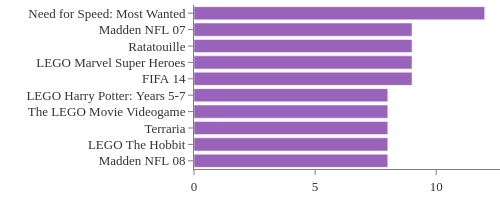

In [658]:
gen.next()

**Наблюдения:**  

- В столбце с названием игры есть 2 пропущенных значения (менее 1%)
- Топ 5 самых встречающихся игр: Need for Speed: Most Wanted, Ratatouille, LEGO Marvel Super Heroes, FIFA 14, Madden NFL 07

Values,16 715 (100%),,PS2 (13%)
Missing,---,,DS (13%)
Distinct,31 (<1%),,PS3 (8%)
Duplicated origin,16 684 (99.8%),,Wii (8%)
Dupl (modify - origin),---,,X360 (8%)
Empty,---,,PSP (7%)
RAM (Mb),<1 Mb,,PS (7%)

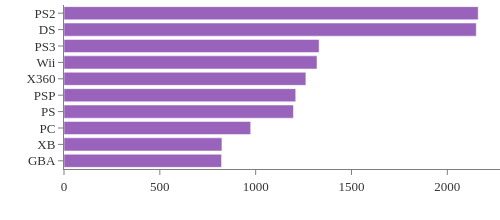

In [659]:
gen.next()

**Наблюдения:**  

- Больше всего игр на платформах PS2 и DS (по 13% от общего числа игр).

Values,16 713 (99.9%),,Action (20%)
Missing,2 (<1%),,Sports (14%)
Distinct,12 (<1%),,Misc (10%)
Duplicated origin,16 702 (99.9%),,Role-Playing (9%)
Dupl (modify - origin),---,,Shooter (8%)
Empty,---,,Adventure (8%)
RAM (Mb),<1 Mb,,Racing (7%)

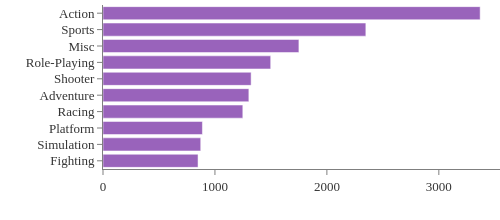

In [660]:
gen.next()

У нас отображаются не все значения жанров, посмотрим на полный список.

In [661]:
pagri_data_tools.value_counts_table(df, 'genre', chunk_size = 6, tables_in_row = 2)

Action,3 369 (20.16%),|,Racing,1 249 (7.47%)
Sports,2 348 (14.05%),|,Platform,888 (5.31%)
Misc,1 750 (10.47%),|,Simulation,873 (5.22%)
Role-Playing,1 498 (8.96%),|,Fighting,849 (5.08%)
Shooter,1 323 (7.92%),|,Strategy,683 (4.09%)
Adventure,1 303 (7.8%),|,Puzzle,580 (3.47%)


**Наблюдения:**  

- В столбце с жанром игры 2% пропусков.  
- Больше всего игр в жанре Action.

Values,9 949 (60%),,E (40%)
Missing,6 766 (40%),,T (30%)
Distinct,8 (<1%),,M (16%)
Duplicated origin,16 706 (99.9%),,E10+ (14%)
Dupl (modify - origin),---,,EC <1%
Empty,---,,K-A <1%
RAM (Mb),<1 Mb,,RP <1%

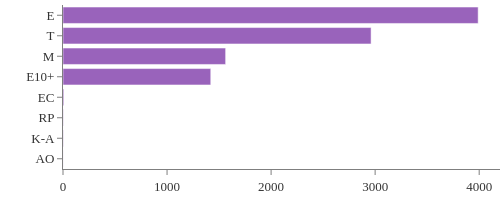

In [662]:
gen.next()

**Наблюдения:**  

- В рейтинге 40% пропусков.
- Больше всего игр с рейтингами E (40%) и T(30%).

#### Изучение дубликатов


Посмотрим на дубли во всем датафрейме


In [663]:
pagri_data_tools.check_duplicated(df)

'no duplicates'

В датафрейме полных строк дубликатов нет.

Посмотрим сколько у нас дублей в каждой колонке


In [664]:
series_duplicated = pagri_data_tools.find_columns_with_duplicates(df)

name,5155 (30.84%)
platform,16684 (99.81%)
year_of_release,16677 (99.77%)
genre,16702 (99.92%)
na_sales,16313 (97.59%)
eu_sales,16408 (98.16%)
jp_sales,16471 (98.54%)
other_sales,16560 (99.07%)
critic_score,16632 (99.50%)
user_score,16619 (99.43%)
rating,16706 (99.95%)


У нас нет столбцов, в которых значения долны быть уникльыми. Поэтом все впорядке.

Посмотрим на дубли в комбинации колонок с названием игры, жанром и платформой.

In [666]:
gen = pagri_data_tools.check_duplicated_combinations_gen(df[['name', 'platform', 'genre']], n=3)

In [667]:
next(gen)

Group by 2 columns


,name,platform,genre
name,,,
platform,5 < 1%,,
genre,5 151 (30.8%),16 421 (98.2%),


**Наблюдения:**  

- В паре платформа и название игры всего 5 дубликатов.
- В парах жанр/название игры и жанр/платформа много дубликатов.

Посмотрим на строки с дублями в названии игры и платформе

In [572]:
df[df[['name', 'platform']].duplicated(keep=False)].sort_values(by=['name', 'platform'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.50,E
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.50,T
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.50,T
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.50,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.50,T
1745,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.10,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.10,E10+
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Посмотрим на пропуски по 3 колонки вместе

In [573]:
next(gen)

Group by 3 columns


name | platform | genre,5


Посмотрим на дубликаты одновременно в названии игры, жанре и платформе

In [574]:
pagri_data_tools.check_duplicated(df[['name', 'platform', 'genre']])

Duplicated is 5 (0.0%) rows


count
name                        platform genre          
NaN                         GEN      NaN           2
sonic the hedgehog          PS3      Platform      2
madden nfl 13               PS3      Sports        2
need for speed: most wanted PC       Racing        2
                            X360     Racing        2

Посмотрим на строки датафрейма с этими дубликатами

In [575]:
df[df[['name', 'platform', 'genre']].duplicated(keep=False)].sort_values(by=['name', 'platform', 'genre'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.50,E
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.50,T
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.50,T
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.50,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.50,T
1745,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.10,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.10,E10+
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Наблюдения:**  

- У игры Madden NFL 13 все параметры совпадают в дублях, кроме количества проданных копий.  
Возможно часть проданных копий учлась отдельно. 
- В игре Need for Speed: Most Wanted у дублей разные года выпуска, поэтому это не дубли.

#### Изучение пропусков


Изучим пропуски в каждом столбце.

In [576]:
series_missed = pagri_data_tools.find_columns_with_missing_values(df)

name,2 (0.01%)
year_of_release,269 (1.61%)
genre,2 (0.01%)
critic_score,8578 (51.32%)
user_score,9125 (54.59%)
rating,6766 (40.48%)


Посмотрим на строки с пропусками в названии игры и в жанре.

In [577]:
df[df['name'].isna() | df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Наблюдения:**  

- Пропуски в одних и тех же строках в названии игры и в жанре.

У нас примерно  одинаковое количество пропусков в оценке критиков и в оценке пользователей.  
Проверим гипотезу, что проуски в одних и  тех же строках.

In [763]:
gen = pagri_data_tools.check_na_combinations_gen(df[['critic_score', 'user_score', 'rating']])

In [764]:
next(gen)

Group by 2 columns


,critic_score,user_score,rating
critic_score,,,
user_score,< 87.7% / ^ 93.3%,,
rating,< 98.8% / ^ 77.9%,< 98.7% / ^ 73.2%,


In [ ]:
next(gen)

In [767]:
df_na_in_both_columns = pagri_data_tools.check_na_in_both_columns(df, ['critic_score', 'user_score'])
df_na_in_both_columns.sample(10)

8005 (47.89% of all) (93.32% of critic_score) (87.73% of user_score) rows with missings simultaneously in ['critic_score', 'user_score']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
755,Mario & Luigi: Superstar Saga,GBA,"2,003.00",Role-Playing,1.48,0.17,0.47,0.06,NaN,NaN,NaN
13011,Luminous Arc Infinity,PSV,"2,015.00",Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
2261,Tobal No.1,PS,"1,996.00",Fighting,0.12,0.08,0.66,0.06,NaN,NaN,NaN
16465,S.Y.K: Shinsetsu Saiyuuki Portable,PSP,"2,010.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
6385,Just Dance Kids 2,Wii,"2,011.00",Misc,0.25,0.00,0.00,0.02,NaN,NaN,E
4377,Rock Band Country Track Pack,Wii,"2,009.00",Misc,0.41,0.00,0.00,0.03,NaN,NaN,E10+
12553,Mike Piazza's Strike Zone,N64,"1,998.00",Sports,0.05,0.01,0.00,0.00,NaN,NaN,NaN
2220,Toy Story 2: Buzz Lightyear to the Rescue!,N64,"1,999.00",Platform,0.71,0.20,0.00,0.01,NaN,NaN,NaN
5172,"999: Nine Hours, Nine Persons, Nine Doors",DS,"2,009.00",Adventure,0.31,0.00,0.03,0.02,NaN,NaN,NaN
10854,Kung Fu Panda 2,PS3,"2,011.00",Action,0.04,0.04,0.00,0.01,NaN,NaN,NaN


**Наблюдения:**  

- Большинство пропусков в столбцах оценка пользователей и оценка критиков находятся в одних и тех же строках.

Добавим ещё столбце с рейтингом и посмотрим сколько пропусков во всех трех столбцах.  

In [773]:
df_na_in_both_columns = pagri_data_tools.check_na_in_both_columns(df, ['critic_score', 'user_score', 'rating'])
df_na_in_both_columns.sample(10)

6667 (39.89% of all) (77.72% of critic_score) (73.06% of user_score) rows with missings simultaneously in ['critic_score', 'user_score', 'rating']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15127,TV Total Events,Wii,"2,011.00",Misc,0.00,0.02,0.00,0.00,NaN,NaN,NaN
3590,Hamtaro: Ham-Hams Unite!,GB,"2,001.00",Role-Playing,0.00,0.00,0.56,0.00,NaN,NaN,NaN
15638,The Crow: City of Angels,PS,"1,997.00",Action,0.01,0.01,0.00,0.00,NaN,NaN,NaN
15379,Detective Jinguuji Saburo: Ronde Revenge,3DS,"2,012.00",Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13762,Dead Ball Zone,PS,"1,998.00",Sports,0.02,0.02,0.00,0.00,NaN,NaN,NaN
7538,Langrisser III,SAT,"1,996.00",Strategy,0.00,0.00,0.20,0.00,NaN,NaN,NaN
8081,Jampack Vol. 1,PS,"1,996.00",Misc,0.10,0.07,0.00,0.01,NaN,NaN,NaN
942,Pinball,NES,"1,984.00",Action,0.80,0.19,0.83,0.03,NaN,NaN,NaN
16552,Shin Koihime Musou: Otome Taisen * Sangokushi ...,PS3,"2,014.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN


**Наблюдения:**  

- Почти все пропуски в рейтинге находятся в тех же строках, что и пропуски в оценке критиков и оценке пользователей.

In [679]:
df[['name', 'genre']].isna().all(axis=1).sum()

np.int64(2)

In [718]:
import importlib
importlib.reload(pagri_data_tools)

<module 'pagri_data_tools' from '/home/pagri/git_repos/pagri_analytics_modules/pagri_data_tools/__init__.py'>

In [ ]:
import missingno as msno

In [ ]:
msno.heatmap(data, figsize=(8,4)) #Рассмотрим совпадают ли пропуски в строках по разным столбцам 
plt.show()

In [ ]:
Рассмотрим динамику и закономерности появления пропусков в столбцах.

In [ ]:
Наблюдается резкий рост количества выпускаемых игр после 2000 года, также после 2000 года одна и та же игра начала появляться на разных платформах. Пик количества выпускаемых игр достигает в 2007-2008 годах, после чего падает, начинают развиваться смартфоны, мобильный интернет, компьютерные игры.

In [ ]:
#Рассмотрим количество выпущенных игр за весь период наблюдений
fig, ax=plt.subplots(figsize=(10,8))
sum_un=data.pivot_table(index='year_of_release', values='name', aggfunc=lambda x: len(x.unique())) #Количество выпускаемых игр
sum_total=data.pivot_table(index='year_of_release', values='name', aggfunc='count') #Количество выпускаемых игр с учетом релиза на разных платформах
graph=sum_un.merge(sum_total, left_index=True, right_index=True).reset_index()
ax.plot(graph['year_of_release'], graph['name_x'])
ax.plot(graph['year_of_release'], graph['name_y'])
ax.set_xlabel('Год выпуска')
ax.set_title('Количество выпущенных игр')
ax.legend(['уникальные значения', 'разные платформы'])
plt.show()

In [ ]:


# Рассмотрим, какую долю занимают игры без рейтинга в общих продажах
total_sales=data.pivot_table(index='year_of_release', values='total_sale', aggfunc='count')
total_sales_sum=data.pivot_table(index='year_of_release', values='total_sale', aggfunc='sum')



In [ ]:
columns_gap=['critic_score', 'user_score', 'rating']
for column in columns_gap:
    fig = plt.figure(figsize=(16,6)) 
    score_gap=data.loc[data[column].isna()].pivot_table(index='year_of_release', values='total_sale', aggfunc='count')
    ratio_table=score_gap.merge(total_sales, right_index=True, left_index=True)
    ratio_table.columns=['nan', 'total']
    ratio_table['ratio_nan']=ratio_table['nan']/ratio_table['total']
    ratio_table=ratio_table.query('ratio_nan<0.9')
    score_gap_sum=data.loc[data[column].isna()].pivot_table(index='year_of_release', values='total_sale', aggfunc='sum')
    ratio_table_sum=score_gap_sum.merge(total_sales_sum, right_index=True, left_index=True)
    ratio_table_sum.columns=['nan', 'total']
    ratio_table_sum['ratio_nan']=ratio_table_sum['nan']/ratio_table_sum['total']
    ratio_table_sum=ratio_table_sum.query('ratio_nan<0.9')
    ax1 = fig.add_subplot(1, 2, 1)
    ax1=sns.barplot(x=ratio_table.index,
               y='ratio_nan',
               data=ratio_table,
               palette=['lightblue'])
    plt.xticks(rotation=90)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2=sns.barplot(x=ratio_table_sum.index,
               y='ratio_nan',
               data=ratio_table_sum,
               palette=['lightblue'])
    plt.xticks(rotation=90)
    ax1.set_xlabel('Год выпуска')
    ax1.set_ylabel('Доля строк с пропусками')
    ax2.set_xlabel('Год выпуска')
    ax2.set_ylabel('Доля продаж игр с пропусками')
    plt.suptitle(column)
    plt.show()

In [ ]:


    Только после 1999 года начинают появляться отзывы пользователей, возможно, не было системы/платформы, на которой аккумулировались эти данные.
    Доля пропусков в возрастном рейтинге резко снижается после 1999 года, так как данная организация начала действовать в 1994 году и присвоение рейтинга происходило постепенно
    Можно отметить, что количество пропусков в отзывах возрастает с увеличением количества выпускаемых игр, при этом видно, что несмотря на то, что эти игра имеют существенную долю от общего количества игр, их доля от общих продаж намного ниже. Скорее всего, это малопопулярные игры, которые не набрали нужного количества отзывов для формирования оценки
    Количество пропусков в рейтинге пользователей/критиков начинает увеличиваться после 2005 года, скорее всего, это связано с выпуском нового поколения консолей, для которых выпускалось большое количество разных малопопулярных игр
    Так как количество пропусков высокое, при этом относятся они скорее всего к малопопулярным играм, а также очевидной зависимости от других параметров для них нет, заполнение их посторонними данными нецелесообразно



#### Изучение выбросов


Посмотрим на выбросы используя квантили.    
Выбросами будем считать значения, которые выходят за пределы 5 и 95 квантилей.

In [580]:
series_outliers = pagri_data_tools.detect_outliers_quantile(df)

year_of_release,1209 (7.23%)
na_sales,829 (4.96%)
eu_sales,829 (4.96%)
jp_sales,822 (4.92%)
other_sales,787 (4.71%)
critic_score,709 (4.24%)
user_score,677 (4.05%)


**Наблюдения:**  

- Процент выбросов во всех колонках, кроме года выпуска, находится в диапазоне 0-5%. Это может указывать на то, что данные достаточно чистые и не содержат значительных аномалий.
- Процент выбросов во всех колонках примерно одинаковый, что может свидетельствовать об однородности данных.

#### Изучение отрицательных значений


Посмотрим есть ли у нас отрицательные значения.

In [581]:
series_negative = pagri_data_tools.find_columns_with_negative_values(df)

There are no negative values


Отлично. Отрицательных значений нет.

#### Изучение нулевых значений


Изучим нулевые значения в каждом столбце.

In [582]:
series_zeros = pagri_data_tools.find_columns_with_zeros_values(df)

na_sales,4508 (26.97%)
eu_sales,5870 (35.12%)
jp_sales,10514 (62.90%)
other_sales,6601 (39.49%)
user_score,1 (0.01%)


Один пользователь поставил оценку 0. Посмотрим на эту запись.

In [583]:
series_zeros['user_score']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,"2,008.00",Adventure,0.66,0.00,0.00,0.06,NaN,0.00,E


Ничего особенного не обнаружено.

Нули в количестве продаж это нормально. 

### Промежуточный вывод


- В столбце с годом выпуска 2 % пропусков.
- В столбце с оценкой критиков 51% пропущенных занчений.
- В столбце с оценкой пользователей 55% пропущенных значений.
- В столбце с названием игры есть 2 пропущенных значения (менее 1%)
- В столбце с жанром игры 2% пропусков.  
- В рейтинге 40% пропусков.
- Значение 0 в оценке пользователей явно является аномалией.
- Процент выбросов во всех колонках, кроме года выпуска, находится в диапазоне 0-5%. Это может указывать на то, что данные достаточно чистые и не содержат значительных аномалий.
- Процент выбросов во всех колонках примерно одинаковый, что может свидетельствовать об однородности данных.
- Почти все пропуски в рейтинге находятся в тех же строках, что и пропуски в оценке критиков и оценке пользователей.
- Большинство пропусков в столбцах оценка пользователей и оценка критиков находятся в одних и тех же строках.
- Пропуски в одних и тех же строках в названии игры и в жанре.
- Есть странное значение tbd, которое не является числом. И таких значений 24 %.
- Игры имеют год выпуска от 1980 до 2016 года.
- Основная часть игр имеет год выпуска от 2003 до 2010 года.
- Больше всего игр 2008 года.
- В столбце с продажами в Северной Америке есть нули (27%). По видимому для этих игр не было продаж в Северной Америке.
- Количество проданных игр в Северной Америке лежит в диапазоне от 0 до 41.36 млн.
- В основном количество проданных игр в Северной Америке находится в диапазоне от 0 до 0.24 млн.
- В столбце с продажами в Европе есть нули (35%). По видимому для этих игр не было продаж в Европе.
- Количество проданных игр в Европе лежит в диапазоне от 0 до 28.96 млн.
- В основном количество проданных игр в Европе находится в диапазоне от 0 до 0.11 млн.
- В столбце с продажами в Японии есть нули (63%). По видимому для этих игр не было продаж в Японии.
- Количество проданных игр в Японии лежит в диапазоне от 0 до 10.22 млн.
- В основном количество проданных игр в Японии находится в диапазоне от 0 до 0.4 млн.
- В столбце с продажами в других странах есть нули (39%). По видимому для этих игр не было продаж в других странах.
- Количество проданных игр в других странах лежит в диапазоне от 0 до 10.57 млн.
- В основном количество проданных игр в других странах находится в диапазоне от 0 до 0.03 млн.
- Оценка критиков лежит в диапазоне от 13 до 98.
- В основном критики ставят оценки от 60 до 79.
- Оценка пользователей варируется от 0 до 9.7.
- В освновном пользователи ставят оценки от 6.4 до 8.2
- Топ 5 самых встречающихся игр: Need for Speed: Most Wanted, Ratatouille, LEGO Marvel Super Heroes, FIFA 14, Madden NFL 07
- Больше всего игр на платформах PS2 и DS (по 13% от общего числа игр).
- Больше всего игр в жанре Action.
- Больше всего игр с рейтингами E (40%) и T(30%).

## Предобработка данных


Сохраним исходный датафрейм в переменную df_origin, чтобы была возможность вернуться к нему


In [584]:
df_origin = df.copy()

### Обработка выбросов


Посмотрим где у нас нулевые значения


In [585]:
pagri_data_tools.check_zeros_value_in_df(df)

,zeros
na_sales,4508 (27.0%)
eu_sales,5870 (35.1%)
jp_sales,10514 (62.9%)
other_sales,6601 (39.5%)
user_score,1 (0.0%)


Удалим одну строку, где оценка пользователя равна 0.

In [586]:
df.shape[0]

16715

In [587]:
df = df[(df.user_score != 0)]
df.shape[0]

16714

In [588]:
pagri_data_tools.check_zeros_value_in_df(df)

,zeros
na_sales,4508 (27.0%)
eu_sales,5869 (35.1%)
jp_sales,10513 (62.9%)
other_sales,6601 (39.5%)


Не осталоьс столбцов, в которых не должно быть нулей.

### Обработка пропусков


In [589]:
pagri_data_tools.check_missed_value_in_df(df)

,missed
name,2 (0.0%)
year_of_release,269 (1.6%)
genre,2 (0.0%)
critic_score,8577 (51.3%)
user_score,9125 (54.6%)
rating,6766 (40.5%)


Так как пропусков в столбцах с названием игры, жанром и годом выпуска мало и мы не можем восстановить с хорошей точностью эти значения,  
то удалим их.

In [590]:
df.shape[0]

16714

In [591]:
df = df.dropna(subset='name')
df.shape[0]

16712

In [592]:
df = df.dropna(subset='genre')
df.shape[0]

16712

In [593]:
df = df.dropna(subset='year_of_release')
df.shape[0]

16443

В рейтинге заменим пропуски на значение 'не указано'

In [594]:
df.rating.value_counts(dropna=False)

rating
NaN     6676
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [595]:
df['rating'] = df['rating'].cat.add_categories(['не указано'])
df['rating'] = df['rating'].fillna('не указано')

In [597]:
df.rating.value_counts(dropna=False)

rating
не указано    6676
E             3920
T             2905
M             1536
E10+          1393
EC               8
K-A              3
AO               1
RP               1
Name: count, dtype: int64

In [598]:
pagri_data_tools.check_missed_value_in_df(df)

,missed
critic_score,8460 (51.5%)
user_score,8981 (54.6%)


Пропуски в остальных колонках удалять или заменять нельзя, так как их слишком много, и мы исказим данные.  

### Обработка дубликатов

Объеденим задублированные строки для игры Madden NFL 13

In [ ]:
df.shape[0]

16443

In [ ]:
df[df[['name', 'platform', 'genre']].duplicated(keep=False)].sort_values(by=['name', 'platform', 'genre'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.50,E
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.50,T
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.50,T
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.50,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.50,T


In [ ]:
indices_to_combine = [604, 16230]

# Группируем строки по индексам и объединяем значения
combined_row = df.loc[indices_to_combine].groupby(['name', 'platform', 'genre'], as_index=False).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'other_sales': 'sum',
    'jp_sales': 'sum',
    'critic_score': 'first',
    'user_score': 'first',
    'rating': 'first',
    'year_of_release': 'first'
})

# Обновляем DataFrame, удаляя объединенные строки и добавляя новую
df = pd.concat([df.drop(indices_to_combine), combined_row], ignore_index=True)

In [ ]:
df.shape[0]

16442

In [257]:
df.tail(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16441,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.23,0.00,0.23,83.00,5.50,E


Строки правильно объеденились.

### Приведение данных к удобной форме


Заменим кодировку рейтинга на более понятную и объеденим похожие категории, так как группы с малым количеством игр статистически незначимы.

In [599]:
df.rating.value_counts(dropna=False)

rating
не указано    6676
E             3920
T             2905
M             1536
E10+          1393
EC               8
K-A              3
AO               1
RP               1
Name: count, dtype: int64

In [602]:
df.rating.astype(str).map({'E': 'для всех', 'T': 'подростковый', 'M': 'взрослый', 'E10+': 'для всех от 10 лет '
                           , 'EC': 'раннее детство', 'K-A': 'для всех', 'AO': 'взрослый'
                           , 'RP': 'не указано', 'не указано': 'не указано'}).astype('category').value_counts(dropna=False)

rating
не указано             6677
для всех               3923
подростковый           2905
взрослый               1537
для всех от 10 лет     1393
раннее детство            8
Name: count, dtype: int64

In [267]:
df.Rating.dtype

CategoricalDtype(categories=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], ordered=False, categories_dtype=object)

In [ ]:
df.is_apartment = df.is_apartment.astype(str).map({'True': 'да', 'False': 'нет'}).astype('category')

In [ ]:
    Рейтинг в ожидании (RP)
    Все (E)
    Все 10+ (E10+)
    Подросток (Т)
    Зрелые 17+ (М)
    Только для взрослых 18+ (АО)
    Дети научилсиь говорить (K-A)

In [ ]:
    Для детей (K-A)– для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес (позже в 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+, как промежуточный между Е и Т)

In [ ]:
df.is_apartment = df.is_apartment.astype(str).map({'True': 'да', 'False': 'нет'}).astype('category')

ВАЖНО   
смотрим все переменные во всех датафрейма и приводим одинаковые метрики к одной размерности.  
И размерность делаем удобной для дальнейшего анализа.  
На пример, если у нас мегабайты и их больше 1000, то нужно сделать гигабайты (и важно в названии поля добавить _gb)  
Аналогично для всех метрик, суть в том, что если значение в поле больше 1000 и мы можем записать его в другом измерении, то делаем это.    
То же самое с секундами, минутами, часами и так далее.  
Думаем какая точность нам нужна и меняем размерность.  

> Если у нас в столбце, например, стаж данные в днях, то это нужно преобразовать в года.  
> Также если у нас в других столбцах данные в формате, который нужно изменить для лучшего анализа, то делаем это.


> Округлим значения в поле дохода до целого.  
> Целая часть выглядит реальной. А с дробной частью нужно разбираться почему стоько знаков.


In [ ]:
df.total_income = df.total_income.round().astype('int32')
df.head(1)

,children,age,education,family_status,gender,income_type,debt,total_income,purpose
0,1,42,высшее,женат / замужем,F,сотрудник,0,253876,покупка жилья


> Посмотрим сколько у нас людей с полом XNA осталось


In [ ]:
(df.gender == 'XNA').sum()

1

> Посмотрим кто это


In [ ]:
df[df.gender == 'XNA']

,children,age,education,family_status,gender,income_type,debt,total_income,purpose
10701,0,24,неоконченное высшее,гражданский брак,XNA,компаньон,0,203905,покупка недвижимости


> Всего 1 человек. И мы не можем идентифицировать его пол.  
> Удалим, чтобы не мешало анализировать графики.


In [ ]:
df.shape[0]

21402

In [ ]:
df.drop(df[df.gender == 'XNA'].index, inplace=True)
df['gender'] = df['gender'].cat.remove_unused_categories()
df.value_counts(dropna=False)

21401

In [ ]:
df.shape[0]

### Промежуточный вывод


Чтобы собрать все наблюдения используем это  
нужно поставить `_start_` где начало и `_end_` где конец

Не забываем удалить метки `_start_` и `_end_` 

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.collect_observations(notebook_path, '/home/pagri/git_repos/pagri-projects/quarto/projects/prospective_tariff_for_telecom/temp_for_report.ipynb')

> пишем как обработали данные, например


- Удалили колонки с id образования и семейного статуса, так как нам для графиков лучше подойдут названия, а не id.
- Колонка со стажем имеет совершенно некорректные данные. Чтобы не внести искажение в анализ, удалим эту колонку.
- Удалили отрицательные значения в колонке с количеством детей, которые составляли 0,2% от общего количества записей в данных.


## Обогащение данных и создание новых переменных

### Парсинг внешних источников

описываем процесс парсинга  
описываем источники и переменные

### Создание новых числовых переменных

Сначала пишем все имеющиеся колонки ИИ и просим написать какие новые числовые переменные можно создать.  
Если таблиц много, то идем по одной таблице, закончили с одной идем к следующей.  
Далее в конце можно спросить какие новые числовые можно создать, учитывая все таблицы.

Сразу пишем в файл какие новые переменные создали для промежуточного вывода.  

Новые числовые переменные часто это коэффициенты.  
Нужно подумать из каких имеющихся числовых переменных можно создать коэффициенты.  
То есть это отношение одной переменной числовой к другой. Вот нужно подумать какие такие отношения нам могут помочь в анализе.  

Также новые переменные могут быть, например, расчеты, основанные на других переменных, такие как разница, процентное изменение и т.д.

Числовые переменные создаем не только для дальнейшего их анализа.  
Создание числовой переменной может помочь создать новую категориальную переменную.  

Например есть у нас расстояние до центра в метрах.  
Мы создаем новую числовую переменную расстояние в км.  
Далее строим график зависимости расстояния и цены.  
И определеяем где цена резко меняется и получаем границу для создания новой категориальной переменной, в которой будет центр и остальное.  

Создадим переменную соотношение жилой и общей площади

In [ ]:
df['living_total_ratio'] = round(df['living_area'] / df['total_area'],2)

Values,21 796 (92%),,Max,1,,Avg,0.56,,0.56 (4%)
Missing,1 903 (8%),,95%,0.73,,Mode,0.56,,0.55 (4%)
Distinct,91 (<1%),,75%,0.64,,Range,0.98,,0.6 (4%)
Duplicates,23 607 (99.6%),,Median,0.57,,iQR,0.14,,0.62 (4%)
Zeros,---,,25%,0.5,,std,0.11,,0.58 (4%)
Negative,---,,5%,0.39,,kurt,0.23,,0.57 (4%)
RAM (Mb),<1 Mb,,Min,0.02,,skew,-0.14,,0.59 (4%)

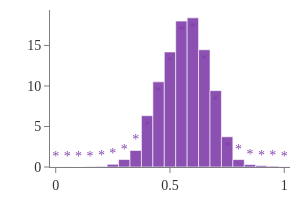

In [ ]:
pagri_data_tools.info_column(df, 'living_total_ratio')

### Категоризация данных


Сначала пишем все имеющиеся колонки ИИ и просим написать какие новые категориальный переменные можно создать.  
Если таблиц много, то идем по одной таблице, закончили с одной идем к следующей.  
Далее в конце можно спросить какие новые категориальные переменные можно создать, учитывая все таблицы.

ВАЖНО  
следим, чтобы не осталось пропусков в категориальной переменной  
все пропуски нужно заменить на что-то типа - не указано

In [ ]:
df.columns.isna()sum()

Если есть пропуски, то добавляем 

In [ ]:
.fillna("не указано").astype('category')

Если мы при загрузке данных не смогли изменить типы данных из-за пропусков, то теперь меняем типы данных. 

У нас могут быть категориальные переменные не только для изучения данных на графиках под другим углом,  
но категориальные переменные можно использовать для изучения среза данных.  
Таким образом думаем какие срезы в датафрейме дадут нам важную информацию. И создаем категориальную переменную для них.  
Например, у нас в данных есть растояние до центра, мы можем создать новую категориальную переменную и поместить туда катгории растояния до центра.  
И затем изучить отдельные срезы в данных, например квартиры только в центре.  

Думаем какие категориальные переменные сделать для срезов.  

Могут быть операции разность, сумма отношение с другими переменными, которые дадут новую переменную.  
Смотрим на имеющиеся переменные и думаем какие из этих операций можно применить.  

> Важно, когда создали новые переменные, особенно числовые, то нужно их изучить через my_info (взять df только с нужными столбцами)  
Посмотреть на гистограммы и стат параметры.  

> Если у нас есть категориальная переменная, в которйо больше 3 значений, то нужно подумать а не можем ли мы из нее сделать  
> новую категориальную переменную с 2-3 значениями, но тут важно, чтобы это несло смысл. Тут нам может помочь ИИ. И сообразительнсоть. Часто сразу не заментны возможные категории, котоыре несут смысл.  
> Тут исходим из смысла, наша задача созадть перменную, которая добавит нашему исследованию новый смысл, даст как бы новый разрез, и это улучшит  
> качество наших выводов.  
> Например, у нас столбец семейный стату, и там 6-7 статусов, мы можем собрать их в 2 семейный статус и не семейный статус.  
> Тут отлично помогает ИИ. Пишешь ему название переменной, униальные значения в ней,  
> и просишь придумать возможную новую категориальнуюд переменную из 2-3 значений.


> Вообще при категоризации ИИ очень хорошо помогает, он может дать идеи возможных категорий на оснвое имеющихся значений.  
> Поэтому можно все столбцы прогонять через ИИ и смотреть что он предлагает, если есть то , что даст новый разрез нашим данным, то созадем категорийю.


> Важно, когда мы создаем категории, то всегда смотреть value_counts.  
> И делаем так, чтобы в каждой группе было достаточно элементов, хотя бы больше 30, а лучше больше 100.  
> Иначе выводы будут некоректные.  
> В идеале, чтобы количество элементов в каждой группе было от 1000. Лучше изменить диапазон и забрать часть данных от другой категории.


> Важно, когда создаем категориальную переменную, то даем ей тип `category`  
> Чтобы она появилась на графиках (так как идет фильтрация на числовые и категориальные)  
> и чтобы места меньше занимала


> Придумываем какие колонки можно дополнительно сделать из имеющихся.  
> Например у нас есть колонка длительность звонков, и 0 это пропущенный звонок,  
> мы можем сделать колонку is_missed, в которой будет true или false


> Стараемся сделать категориальную колонку с да нет для всех возможных колонок.  
> Например, у нас колонка количество детей и есть 0, 1, 2, 3, 4, 5 мы созадем колнку  
> есть дети или нет. 2 значения  
> Это очень полезно, так как мы можем посмотреть это на графиках и проверить гипотезы  
> стат тестами.


> Смотрим на колонки и думаем можно ли из нее сделать колонку с 2 значениями,  
> например есть и нет что-то


> Очень важно, когда мы создаем новые колонки, в которых используем несколько дургих, то нужно проверить распределение этой новой переменной, особенно выбросы.  
> Например, у нас начальная и конечная дата сессии и мы считаем длительность сессии. Вот тут нужно посмотреть какая минимальная длительность  
> и какая максимальная. Ну и естественно проверить есть ли длительность 0 и меньше нуля.  
> Таким образом мы можем найти инсайты уже после создания новых колонок, хотя в изначальных данных этих инсайдов не было видно.


> Обычная категоризация данных


> Категоризация помогает избежать проблемы с разреженными данными, когда у нас есть слишком много групп с небольшим количеством элементов.  
> Это может привести к некорректным выводам и ошибкам в анализе.
> Категоризация нужна, чтобы образовать группы, в которых достаточно значений для использования статистических методов.  
> И вообще, если в группе 1-10 элементов, например у нас возраст пользователей и 5 человек с возрастом 22, 3 человека с возрастом 23 и так далее.  
> Мы не можем разбивать по таким группам, так как их размер небльшой и выводы будут некорректные, поэтому нам нужно собрать их в группы,  
> чтобы у нас были группы с достаточным размером.


- Если у нас категориальная переменная имеет много значений, то мы не можем номрально с ней работать.
  > Так как мы не можем построить графики по ним, так как их много и они не числовые. Не можем сравнить их все.  
  > Поэтому нам нужно сократить категории.
- Нужно посмотреть на данные и подумать можем ли мы разделить их по сегментам рынка или по другим категориям, которые нам помогут.
- Мы можем категоризировать на основе и числовых и категориальных столбцов. То есть мы можем из категориальной переменной сделать
  > другую категориальную, уменьшив или увеличив разбиение.
- добавление категорий обогощает данные, при чем категории могут формироваться не из одной колонки, а из серии, то есть чтобы попасть
  > в определенную категорию значения столбцов должно быть такое то, а не только один столбец определяет категорию.
- категории могут быть да нет, то есть состоять из двух значений, например, у нас есть данные о рекламе и столбец где она показвалась,
  > и у нас много много разных устройств. Мы можем разбить на да нет, то есть показвалась реклама по телеку или нет


> Мы можем разбить данные на категории двумя способами

- разбивать на равные части
  > подходит, когда
  >
  > - диапазон значений является равномерным и имеет линейную структуру
  > - мы понимаем на какие интервалы хотим разбить данные
  > - мы хотим разделить диапазон значений на равные части для удобства анализа.
- разбить на основе квантилей
  > подходит, если
  >
  > - диапазон значений имеет неравномерную структуру
  > - мы не можем понять какие интервалы выбрать
  > - хотим выделить группы с конкретными характеристиками (например, группы с низким доходом, средним доходом и высоким доходом)


> Выбираем нужные способ и используем  
> `create_category_column`


> Чтобы посмотреть распределение по квантилям используем `pagri_data_tools.quantiles_columns()`


Не забываем новые каеториальные переменные делать `.astype('category')`

In [ ]:
.astype('category')

ВАЖНО  
создали новую переменную, сразу же изучили ее использу `info_gen`  
задаем вопросы и пишем важные наблюдения  

In [ ]:
pagri_data_tools.info_column(df, 'price_segment')

In [ ]:
df['floor_cat'] = df.apply(lambda x: 'первый' if x['floor'] == 1 else 'последний' if x['floor'] == x['floors_total'] else 'другой', axis=1).value_counts()

In [ ]:
pagri_data_tools.quantiles_columns()

In [ ]:
pagri_data_tools.create_category_column()

> Сделаем следующие группы

- до 30 лет
- от 30 до 40 лет
- от 40 до 50 лет
- от 50 до 60 лет
- старше 60 лет


In [ ]:
labels = ['до 30', '30-40', '40-50', '50-60', 'старше 60']
bins = [-np.inf, 30, 40, 50, 60, np.inf]

In [ ]:
df['age_cat'] = pagri_data_tools.create_category_column(df.age, labels=labels, bins=bins)
df['age_cat'].value_counts(dropna=False)

30-40        5704
40-50        5241
50-60        4520
до 30        3804
старше 60    2132
Name: age_cat, dtype: int64

Создаем новые переменные из времени

In [ ]:
gen = pagri_data_tools.info_gen(df_internet, column='mb_used_cat', mode='column')
gen.next()

In [ ]:
weekday_dict = {
    'Monday': 'Понедельник',
    'Tuesday': 'Вторник',
    'Wednesday': 'Среда',
    'Thursday': 'Четверг',
    'Friday': 'Пятница',
    'Saturday': 'Суббота',
    'Sunday': 'Воскресенье'
}
month_dict = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

In [ ]:
df['publication_weekday'] = df['first_day_exposition'].dt.day_name().map(weekday_dict).astype('category')
df['publication_month'] = df['first_day_exposition'].dt.month.map(month_dict).astype('category')
df['publication_year'] = df['first_day_exposition'].dt.year.astype(str).astype('category')
# Задаем порядок для weekdays
weekday_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
df['publication_weekday'] = df['publication_weekday'].cat.reorder_categories(weekday_order, ordered=True)

# Задаем порядок для months
month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
df['publication_month'] = df['publication_month'].cat.reorder_categories(month_order, ordered=True)


In [ ]:
df.columns.isna()sum()

In [ ]:
gen = pagri_data_tools.info_gen(df_internet, column='mb_used_cat', mode='column')
gen.next()

Чтобы получить формат `янв'09`

In [ ]:
# Словарь для замены месяцев
months_translation = {
    'Jan': 'Янв',
    'Feb': 'Фев',
    'Mar': 'Мар',
    'Apr': 'Апр',
    'May': 'Май',
    'Jun': 'Июн',
    'Jul': 'Июл',
    'Aug': 'Авг',
    'Sep': 'Сен',
    'Oct': 'Окт',
    'Nov': 'Ноя',
    'Dec': 'Дек'
}
# Получаем отдельно месяц и год
months = df['first_day_exposition'].dt.strftime('%b').astype('category').cat.reorder_categories(list(months_translation.keys()), ordered=True)
years = df['first_day_exposition'].dt.strftime('%y')
months_years = pd.concat([months, years], axis=1)
months_years.columns = ['month', 'year']
# Создаем список уникальных (год, месяц) и сортируем
unique_months = months_years.drop_duplicates().sort_values(by=['year', 'month'])

# Создаем список для порядка
month_year_order = []

# Формируем month_year_order на основе уникальных (год, месяц)
for _, row in unique_months.iterrows():
    year = row['year']
    month = row['month']
    month_year_order.append(f"{months_translation[month]}'{str(year)[-2:]}")

# Заменяем месяцы и соединяем с годом
df['publication_month_year'] = months.astype(str).map(months_translation) + "'" + years
df['publication_month_year'] = df['publication_month_year'].astype('category')
df['publication_month_year'] = df['publication_month_year'].cat.reorder_categories(month_year_order, ordered=True)
df['publication_month_year']

In [ ]:
df.columns.isna()sum()

In [ ]:
gen = pagri_data_tools.info_gen(df_internet, column='mb_used_cat', mode='column')
gen.next()

Для верменных переменных нужно делать не только отедльно месяц, год.  
Но и делать категориальную переменную обрезая время.  
То есть мы созадем переменную   
Янв'23

Но нужно подумать, нужна ли нам будет именно временная переменная, или достаточно категории,  
если будет нужна временная, то создаем обрезанную переменную datetime используя .dt.round()

> Категоризация с использованием лемматизации


> Если у нас есть столбец и мы хотим его лематизировать, то используем функцию  
> `lemmatize_column`


> Чтобы создать лемы для словаря категоризации, можно посмотреть имеющиеся предложения и использовать
>
> ```
> m = Mystem()
> m.lemmatize('образованием')
> ```


In [ ]:
m = Mystem()
m.lemmatize('образованием')

In [ ]:
pagri_data_tools.lemmatize_column()

In [ ]:
categorization_dict = {
    'недвижимость': ['жилье', 'недвижимость']
    , 'образование': ['образование']
    , 'автомобиль': ['автомобиль', 'машина']
    , 'свадьба': ['свадьба'] 
}

In [ ]:
df['purpose_new'] = pagri_data_tools.categorize_column_by_lemmatize(df.purpose, categorization_dict, use_cache=True)
df['purpose_new'].value_counts(dropna=False)

недвижимость    10779
автомобиль       4288
образование      3997
свадьба          2337
Name: purpose_new, dtype: int64

> Если нужно, уддалим старую колонку


In [ ]:
df = df.drop('purpose', axis=1).rename(columns={'purpose_new': 'purpose'})
df.head(1)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,dob_cat,total_income_cat
0,1,42,высшее,женат / замужем,F,сотрудник,0,253876,Недвижимость,40-50,200-500 тыс


> С помощью лематизации мы можем сократить количество категорий.


> Например мы можем выделить группы:

- операции с автомобилем (ключевое слово - автомобиль)
- операции с недвижимостью (ключевые слова: жилье, недвижимость)
- проведение свадьбы (ключевое слово: свадьба)
- получение образования (ключевое слово: образование)


> Используем функцию  
> `categorize_column_by_lemmatize`


In [ ]:
pagri_data_tools.categorize_column_by_lemmatize()

Из времени также можно сделать категориальный переменные, например, создать переменную для времени заправки, если больше 1 минуты, то долгая заправка, иначе короткая и так далее.


ВАЖНО подумать какие переменные мы можем создать не только категориальные, но и числовые и временные.  
Например, обрезание времени, чтобы получить дату по часам и прочее,


> Если мы хотим преобразовать категории в числа, то мы можем использовать

- lable encoding
  > Заменяем быквы числами. Хорошо работает, когда у нас порядковые категориальные переменные.  
  > Не забываем про порядок, если у нас алфавитный порядок наших категорий соотвествует числовому, то ок,  
  > если нет, то нам нужно самим определить порядок чисел, чтобы они соответствовали категориям в нужном порядке.
- one hot encoding
  > Если у нас категориальная переменная не упорядочиваемая, то лучше использовать one hot encoding, чтобы разница между числами не вносила шум,  
  > так как черный и белый и красный цвет закодированные 1, 2, 3 вносят смысл количества, но они не имеют этого свойства.
- target encoding
  > замена категориальной переменной на каую-то статистику по одной из категорий внутри этой переменной.  
  > Например у нас категориальная переменная это наличие задержки. Значение задержан / незадержан. Мы кодируем их как 0 и 1. Далее мы берем и считаем по каждой группе (для задержан и для незадержан)  
  > статистику, например, среднее и получаем столбец, где вместо каждой буквы будет ее среднее.  
  > Тут важно делать регуляризацию. Так как маленькие группы могут иметь сильно зашумленные статистики, так как если у нас  
  > группа из 5 значений, то среди них может быть легко экстремальное одно и оно сбивает статистику, поэтому добавляем штраф всем статистикам.  
  > Регуляризация это что-то похожее на сглаживание.  
  > Как это делается
  >
  > - берем считаем среднее по таргету (целевой переменной, то есть той, по которой мы счтаем статистику) всей таблице (то есть не делим на категории)
  > - Далее используем следующую формулу для сглаженного значения среднего по конкретной группе:  
  >   (среднее по группе _ количество элементов в группе + среднее по таргету без учета категорий _ размер регуляризирующей группы) / (количество элементов в категории + размер регуляризирующей группы)  
  >   Количество элементов в регуляризационнной группе выбирает эмперически. То есть это количество элементов, которым мы сглаживаем.  
  >   Смысл в том, что мы берем сколько-то элементов с занчением для всех категорий и сглаживаем им наши отдельные категории.
  > - Размер регуляризирующей группы обычно выбирают с помощью grid search, то есть берут цикл для размера этой группы и считают результат модели для каждого размера,  
  >   и потом выбирают тот размер, для которого результат лучше.
  >
  > `target_encoding_linear`  
  > `target_encoding_bayes`


In [ ]:
pagri_data_tools.target_encoding_linear()
pagri_data_tools.target_encoding_bayes()

> Использование кластеризации для категоризации


> Можно понизить размерность до 3  
> и построить 3 д график  
> По этому графику посмотреть есть ли у нас возможные кластеры  
> Если есть, то выделить их  
> Причем для понижения размерности можно брать все столбцы, а можно только часть.


### Объединение данных


Сначала все одниаковый по смыслу поля в разных таблицах приводим к одному названию.

Важно  
Все новые таблицы начинаем с `df_`  чтобы потом не нужно было искать навзание   
вводишь `df_` и далее будет список переменных таблиц

ВАЖНО  
Перевести id всех сущностей в числа и чтобы уникальность сохранилась.  
Это нужно для анализа на графиках, чтобы можно было для них аггрегировать по count и nunique

Если будет много новых таблиц, то созадем подразделы   
- без аггрегации 
- с аггрегацией

Не забываем про ИИ  
Пишем ему задание типа такого -  
пишем какие таблицы у нас есть, название таблицы, поля таблицы с описанием полей.  
и спрашиваем какие новые таблицы можно создать, чтобы проанализировать данные.  
Какие аггрегации сделать и так далее.  
Вот пример

у меня есть таблица 
users с полями 
- user_id - уникальный идентификатор пользователя
- first_name - имя пользователя
далее пишем все имеющиеся поля
есть таблица calls с полями 
- id - уникальный номер звонка
- call_date - дата звонка
и так далее описываем все таблицы и поля  
Пишем цель анализа, можно скопировать из описания и цели
И далее пишем что нужно 
- это pandas dataframes какие таблицы я могу из них сделать для будущего анализа, чтобы подробно все проанализировать, что с чем объеденить, какую аггрегацию выбрать, расскажи подробно и как можно больше

Вот структурированный подход к выбору таблиц для объединения при анализе данных:

1. Начните с бизнес-задачи:
- Четко определите, какой анализ вам нужно провести
- Какие метрики вы хотите получить
- Какие гипотезы проверить
2. Создайте карту данных:
- Выпишите все доступные датафреймы
- Для каждого датафрейма укажите ключевые поля
- Отметьте связи между таблицами (общие ключи)
3. Выберите основную таблицу:
- Определите центральную сущность анализа (например, пользователь или транзакция)
- Выберите таблицу с этой сущностью как базовую
4. Определите необходимые признаки:
- Составьте список всех нужных переменных для анализа
- Отметьте, в каких таблицах они находятся
- Исключите таблицы с избыточной информацией
5. Спланируйте последовательность объединения:
- Начните с основной таблицы
- Добавляйте только те таблицы, которые содержат нужные признаки
- Учитывайте гранулярность данных (уровень агрегации)

##### Создание таблиц без аггрегации

ОЧЕНЬ ВАЖНО когда мы соединяем несколько таблиц в одну, то нужно добавить метку откуда мы берем данные, если это не один источник просто в разных таблицах.  
По сути разные таблицы это категориальная переменная, и общая метрика которую мы соберем из разных фреймов, должна быть изучена в разрезе этой категории тоже.  
И также важно посмотреть структуру метрики по этой новой категории.

Чаще всего у нас будет таблица фактов и таблица измерений.  
И наша задача добавить категории к таблице фактов для дальнейшего анализа.

Думаем какие метрики нам нужно обхеденить в один датафрейм, чтобы потом проанализировать.  
Обычно мы берем датафрейм где есть числовая переменная, которую мы хотим проанализировать и к этому  
датафрейму добавляем категориальные переменные из других датафреймов.   
Также можно добавлять числовые перменные для анализа корреляции.  

Все новые созданные таблицы записываем в temp.ipynb

Сначала думаем какие таблицы соеденить для анализа без аггрегации.  
Чтобы проанализировать не аггрегированные данные.  
Тут нужно изучить размеры таблицы и какие зависимости нам было бы полезно изучить.  
Далее посчитать сколько будет строк в случии объединения без аггрегации и если памяти хватает, то делаем.  

Например, у нас есть таблицы тарифом, сообщений, пользователей, звонков.  
Объеденить в один фрейм мы их не можем, но мы можем создать отдельные фреймы для сообщений, звонков и трафика без аггрегации.  
И потом уже отдельно их изучить в dash app. 

Создадим дополнительные таблицы для анализа

Создадим отдельные таблицы для анализа выручки для звонков, сообщений и интернета.

In [ ]:
print('len of df_calls = ', len(df_calls))
print('len of df_messages = ', len(df_messages))
print('len of df_internet = ', len(df_internet))

len of df_calls =  202607
len of df_messages =  123036
len of df_internet =  149396


In [ ]:
calls_users = df_calls.merge(df_users, on='user_id', how='left')
messages_users = df_messages.merge(df_users, on='user_id', how='left')
internet_users = df_internet.merge(df_users, on='user_id', how='left')

In [ ]:
print('len of calls_users = ', len(calls_users))
print('len of messages_users = ', len(messages_users))
print('len of internet_users = ', len(internet_users))

len of calls_users =  202607
len of messages_users =  123036
len of internet_users =  149396


Добавим информацию о тарифах

In [ ]:
calls_full = calls_users.merge(df_tariffs, left_on='tariff', right_on='tariff_name', how='left')
messages_full = messages_users.merge(df_tariffs, left_on='tariff', right_on='tariff_name', how='left')
internet_full = internet_users.merge(df_tariffs, left_on='tariff', right_on='tariff_name', how='left')

In [ ]:
print('len of calls_full = ', len(calls_full))
print('len of messages_full = ', len(messages_full))
print('len of internet_full = ', len(internet_full))

len of calls_full =  202607
len of messages_full =  123036
len of internet_full =  149396


Количество строк не изменилось, все хорошо. 

Вот так нужно подумать и создать все нужные таблицы без аггрегации.  

##### Создание таблиц с аггрегацией

ОЧЕНЬ ВАЖНО когда мы соединяем несколько таблиц в одну, то нужно добавить метку откуда мы берем данные, если это не один источник просто в разных таблицах.  
По сути разные таблицы это категориальная переменная, и общая метрика которую мы соберем из разных фреймов, должна быть изучена в разрезе этой категории тоже.  
И также важно посмотреть структуру метрики по этой новой категории.

ВАЖНО  
вниметльно выбираем функции для аггрегации.  
Думаем какая аггрегирующая метрика нам нужна. Возможно нужно несколько, то используем несколько `.agg(mb_used=('mb_used', 'sum'), mb_used_avg=('mb_used', 'mean'))`

Думаем нужно ли считать   
`mean, median, count, nunique, sum`

Нужно хорошо подумать какие аггрегационные метрики нам будут нужны для анализа на графиках.  
Так как без аггрегации мы в dash app сами выбираем аггрегацию, а тут аггрегация уже сделана, поэтому нам нужно выбрать аггрегацию заранее.

ВАЖНО  
чтобы дальше при анашизе не было путаницы, аггрегированные метрики называем с префикосом аггрегации, например, avg_age, sum_revenue

И не забываем, что если мы рассчитали несколько аггрегирующих метрик в agg,  
то нужно все их изучить в info_gen

ВАЖНО  
Если мы можем сделать аггрегацию по нескольким столбцам (то есть группируем по нескольим столбцам),  
То не забываем сделать аггрегацию для каждого столбца отдельно.  
Так как в dash app у нас будет автомтаически групироваться по категории и браться, например, среднее занчение.  
И если исходный датафрейм у нас был сгруппирован, например, по месяцу и пользователям, то в итоге у нас будет среднее значение за месяц по пользователям.  
Поэтому нам нужно сделать отдельно аггрегацию по месяцу.  

Нужно подумать как лучше создавать аггрегированные таблицы.  
Сначала нужно определтиь какие уровни аггрегации нам нужны для анализа.  
Наприммер, средняя выручка за день по месяцам, нам нужно чтобы изначально в dash app шла таблица с аггрегацией по дням.  
И так все таблицы. Поэтому очень важно правильно выбирать уровень аггрегации.

Далее переходим к созаднию аггрегированных таблиц.  

Структура объединения с аггрегацией

1. Определение целей анализа
- Формулировка вопросов: Начните с четкого понимания, какие вопросы вы хотите ответить с помощью агрегации. Например, хотите ли вы узнать средний доход по регионам или общее количество продаж по месяцам?
- Идентификация ключевых метрик: Определите, какие метрики будут важны для вашего анализа (например, сумма, среднее, количество, максимум, минимум и т.д.).

2. Анализ исходных данных
- Изучение структуры данных: Посмотрите на каждый из датафреймов, которые вы хотите объединить. Определите, какие переменные есть в каждом из них и какие из них могут быть использованы для агрегации.
- Определение типов данных: Убедитесь, что типы данных в ваших переменных соответствуют тому, что вы хотите агрегировать (например, числовые данные для суммирования).

1. Определение уровня агрегации
- Группировка по уровням: Решите, на каком уровне вы хотите агрегировать данные. Например, вы можете агрегировать данные по месяцам, кварталам или годам, в зависимости от ваших целей.
- Многоуровневая агрегация: Если необходимо, подумайте о многоуровневой агрегации, когда данные агрегируются сначала по одному критерию, а затем по другому (например, сначала по регионам, затем по категориям товаров).  
Примеры:
- По времени (день/месяц/год)
- По объекту (пользователь/продукт/регион)
- По комбинации измерений

2. Классификация полей
- Метрики (что агрегируем)
- Атрибуты (характеристики объектов)
- Группировочные поля (по ним агрегируем)

3. Выбор агрегационных функций для каждого типа данных:
- Числовые: sum, mean, max, min, count
- Категориальные: mode, count, nunique
- Временные: first, last, max, min

Помним, что аггрегировать можно не только по строкам,  
можно использовать pivot_table для аггрегации по столбцам.

Важно не сделать таблицы аггрегации, которые у нас уже потенциально есть в неаггрегированном виде.  
То есть мы создаем аггрегации только для тех ситуаций, когда у нас нет этого без аггрегации.  

Тут важно определить по каким полям мы будем аггрегировать данные.  
И выбрать таблицы, которые нам нужно объеденить, чтобы изучить зависимости их полей.  

Таблиц может быть много, так как если у нас данных много, то нам нужно будет аггрегировать их перед соединением.  
Нужно подумать какие аггрегации нам нужны для анализа и для каждой сделать отдельный датафрейм и добавить нужные категориальные  
перменные из других датафреймов.  

То есть если у нас данных сильно много, то мы думаем как аггрегировать числовую перменную и уже к аггрегированной таблице джойним другие с категориями.  

Когда у нас в двух таблицах разные названия столбцвов, то нужно стандартизировать названия, чтобы они совпадали.  
Если мы используем не inner соединение. Так как при внешенм соединение в итоговой таблице будут пропуски, где нет совпадений.  
И если мы не приведем названия столбцов к одному виду, то у нас получиться, что в одном и другом столбце, по которому мы соединяли,  
будут пропуски. И если нам далее нужно будет соединять с другой таблицей по этому полю, то мы не сможем это сделать.  
И для расчетов также это портит все.  
Поэтому нужно всегда приводить названия столбцов к одному виду.

Если мы не хотим менять название столбца в исходной таблице, то мы можем прям в merge переименовать таблицу  
`df_revenue_by_month = df_revenue_by_month.merge(df_tariffs.rename(columns={'tariff_name': 'tariff'}), on='tariff')`

ВАЖНО  
Если мы можем создать таблицу без аггрегации, то не нужно создавать аггрегированные, так как мы можем в процессе изучения   
в dash app строить разные аггрегации и изучать в разрезах.  
Аггрегация нужна, когда мы не можем объеденить таблицы из-за размера например, и тогда нам нужно уже думать до построения графиков  
какие аггрегации сделать для объединнения таблиц.  
И придется делать много разных таблиц, которые нам нужно изучить. Это минус аггрегации. Так как мы не можем автоматизироваать процесс.

> Проверка соответствия:  
> Если у нас в разных таблицах есть значения, которые дожны быть одинакоые,  
> то нужно проверить, что значения в одном столбце соответствуют значениям в другом столбце.


In [ ]:
df['column_name1'].equals(df['column_name2'])

> Обоготить данные можно следующими способами

- взять поле нашей таблицы и найти дополнительные данные в интернете или ещё где-то и потом связать с нашей колонкой по этому полю
  > Самое просто это дата, если у нас есть дата, то мы можем много разной доп информации внести в наши данные связывая по дате.  
  > Также, например, у нас есть какие-то коды чего-то, мы ищем информацию по этим кодам и находим табличку с доп инфой по этим кодам и можем обоготить ими  
  > нашу таблицу. Например, у нас города или страны, мы можем по ним также внести доп инфу из какого-то источника, которая нам поможет.  
  > Вообще любое поле нашей таблицы это потенцильная нить для обогощения. Главное понять с чем полезным мы можем соеденить  
  > через конкретное поле, чтобы получить больше полезной информации для анализа, по сути для детализации наших зависимостей или для поиска  
  > новых зависимостей и инсайтов в них.  
  > Процесс следующий - мы берем каждую колонку нашего дата сета и думаем, с чем через нее мы можем связать и если придумываем, то идешь ищем эту информацию и  
  > в итоге соединяем.
- Можно пойти от обратного. Сначал подумтаь какие данные нам могут помочь и поискать их в интернете например, а потом уже думать как их соеденить с нашими
  > данными. Оба способа лучше делать одновременно.


> Каждый раз, когда мы работаем с дата сетом, мы должны понять что является сущностью этого дата сета.  
> Например событие, человек и прочее.  
> Далее нам нужно поянть а можем ли мы его идентифицировать по текущим данным (не всегда есть уникальный ай ди).  
> Если не можем, то нужно думта как обогатить данные, чтобы четко идентифицировать сущности


> Что нужно обязательно првоерить после соединения

- если мы соединяем по полю, которое уникально в обеих таблицах
  > - количество строк в левом датафрейме равно количеству строк в итоговом
  > - параметры каждого дата сета не изменились (если мы соединили правильно, то итоговые суммы по столбцам не должны измениться)
  >   - используем `df.sum(numeric_only=True)` для каждой таблицы до соединения и для общей таблицы и сравниваем значения
  >   - можно использвоать `df.describe` также до и после объединения и сравнивать параметры
- если у нас в одной из колонок для соединения не уникальные значения (то есть для одной строки в левой таблице будет несколько в итоговй)
  > - Сначала группируем таблицы, чтобы поле для соединения в обеих таблицах было уникальное
  >   и применяем предыдущий шаг с количеством строк в левой и итоговой и суммой значений в левой и итоговой одинаковой
  > - Если нам нужно соеденить без группировки (но это редко может быть, поэтому нужно подумать точно ли не моежм сгруппировать)  
  >   тогда нет выбора и остаются только следующие варианты  
  >    - если в левой таблице уникальные записи в колонке, по которйо соединяем  
  >    - тогда считаем сколько было записей в левой таблице в колонке для соединения и сравниваем с количеством **уникальных** записей в итоговой  
  >    они должны совпадать, но тут важно в итоговой брать уникальные записи - есил и в левой и правой нет уникальных - тут считаем сколько **уникальных** в левой до и сколько **уникальных** в итоговой, должно совпадать


> Если у нас что-то не сходится после соединения таблиц, то нужно внимально изучить это.  
> Тут может быть инсайт (кто-то не правильно вносит информацию, какие-то значения неверные или кто-то что-то хотел спрятать, не указать и прчоее).  
> Когда видим нестыковки после соединения таблиц, то должна загораться красная лампочка. Это потенциальный инсайт, баг, который мы можем найти и сообщить, чтобы его починили.


> помним, что метод соединения inner стоит по умолчанию в merge


> В колонках, по которым будем соеднить, проверяем, нет ли пропусков, пропуски нужно заменить нулями.  
> Иначе будет либо ошибка, либо пропуски сджойнятся с пропусками


> Проблема справочников  
> При объединение таблиц важно помнить про то, что в разных таблицах не только названия столбцов может быть разное,  
> но и одно значение может быть записано по разному в разных таблицах, например, названия профессий, названия городов,  
> имя в одной таблице на русском, а в другой на английском, номер телефона с черточкой или плюсом и без черточки или плюса.  
> Поэтому не забываем привести все значения таблиц к нижнему регистру, чтобы не было проблем разными регистрами для одного слова


> Проблема временных зон  
> В одной таблице может быть выгрузка по местному времени, а в другом по московскому


> Проблема курсов валют  
> Разыне системы могут брать курс за разные промежутки вермени, например, одна система берет курс в гугле (раз в час обновляется),  
> а другая система берет курс в ЦБ (обновляется раз в сутки)  
> И поэтому итоговые резултаты могут не состыковаться, поэтому, когда видим курсы валют, то нужно убедиться. что они взяты из одного испточника  
> и за один промежуток времени


> Когда мы работаем с данными, нам важно четко идентифицировать клиентов, событие или другую сущность, с которой мы работаем.  
> Иначе у нас будет шум, так как мы одного и того же клиента учтем более одного раза.


> Как можно обоготить данные, чтобы лучше идентифицировать сущности

- Добавить для клиента email, телефон, устройство, 4 цифры карты и другое, что может помочь его идентифицировать
  > Это важно так как у клиента могут быть разные телефоны, устройства, карты, но все это вместе поможет его идентифицировать точнее
- Добавить для события локацию, погоду, связанные событие, праздники, что поможет нам идентифицировать событие


Все новые созданные переменные помещаем в temp.ipynb

### Расчет метрик


ОЧЕНЬ ВАЖНО  
обязательно создать метрику количество всех сущностей, которые есть в датафреймах.   
Так как в анализе категорий мы сравниваем количество в категориях.  
А нам также очень важно посмотреть количество не категоризированных сущностей.  
Нужно подумать как лучше это сделать. В dash app есть функция cnt, главное не забыть ее использовать.  
Но это суммарное, нужно ещё среднее или медианное значение.
Если количество применимо к ним. Например количество пользователей, количество заказов, количество товаров и т.д.
И также важно смотреть суммарное и среднее / медианное значение.
И важно назвать не как было например user_id, а назвать понятнее users_cnt или типа того, чтобы не запутаться на графиках.  
Очень важно давать четкое и понятное детализированное название переменным.   
Это очень сильно помогает далее при анализе.  

ОЧЕНЬ ВАЖНО когда мы соединяем несколько таблиц в одну, то нужно добавить метку откуда мы берем данные, если это не один источник просто в разных таблицах.  
По сути разные таблицы это категориальная переменная, и общая метрика которую мы соберем из разных фреймов, должна быть изучена в разрезе этой категории тоже.  
И также важно посмотреть структуру метрики по этой новой категории.

ВАЖНО  
изучаем отдельно каждую новую метрики через info_gen

In [ ]:
gen = pagri_data_tools.info_gen(df_users, column='age_cat', mode='column')
gen.next()

ВАЖНО  
Когда создали новую переменную, то записываем ее в temp.ipynb название переменной и описание  
Чтобы далее когда нужно будет добавлять в title_for_axis не нужно бьло искать

Сначала все одниаковый по смыслу поля в разных таблицах приводим к одному названию.

Если метрик много, то можно создать подразделы для них.  
Ниже примерные названия подразделов.  
Названия метрик могут повторяться в разных разделах ниже.  
Это нормально, так как многие разделы имеют общее.  
Нужно выбрать разделы, которые лушче подходят для конкретнго проекта.  

Если метрик не много, то просто созадем их в одном разделе  
Каждую новую метрику можно просто выделить начало создания жирным шрифтом

#### Производные метрики

Тут пишем разные производные метрики из имеющихся переменных.  
Тут будут те метрики, которые нельзя отнести к остальным подразделам метрик. 

#### Ключевые показатели эффективности (KPI)

Финансовые KPI

- Выручка — общий доход от продаж товаров или услуг.
- Прибыль — разница между доходами и расходами.
- Рентабельность — отношение прибыли к выручке или к активам.
- Коэффициент ликвидности — способность компании покрыть свои краткосрочные обязательства.
- Себестоимость продаж — общие затраты на производство товаров или услуг.

Операционные KPI

- Производительность — количество продукции, произведенной за единицу времени.
- Уровень запасов — количество товаров на складе в данный момент времени.
- Время выполнения заказа — время, необходимое для обработки и доставки заказа.
- Качество продукции — процент бракованных изделий или уровень удовлетворенности клиентов.

Маркетинговые KPI

- Стоимость привлечения клиента (CAC) — затраты на привлечение одного клиента.
- Конверсия — процент пользователей, совершивших целевое действие (например, покупку).
- Возврат на инвестиции в маркетинг (ROMI) — прибыль, полученная от маркетинговых кампаний.
- Трафик на сайт — количество посетителей на сайте.

KPI для HR

- Текучесть кадров — процент сотрудников, покинувших компанию за определенный период.
- Уровень удовлетворенности сотрудников — измеряется через опросы и анкетирования.
- Среднее время найма — время, необходимое для заполнения вакансии.
- Процент выполнения целей сотрудников — доля сотрудников, достигших своих KPI.

KPI для обслуживания клиентов

- Уровень удовлетворенности клиентов (CSAT) — измеряется через опросы после обслуживания.
- Чистый промоутерский балл (NPS) — измеряет лояльность клиентов.
- Время ответа на запросы — среднее время, необходимое для ответа на запросы клиентов.
- Процент решенных проблем с первого обращения — доля запросов, решенных при первом контакте.

#### Финансовые метрики.

- Выручка
- Прибыль
- Рентабельность
- Операционные расходы
- Кэш-флоу

#### Маркетинговые метрики

- Стоимость привлечения клиента (CAC)
- Пожизненная ценность клиента (LTV)
- Конверсия
- ROI (возврат на инвестиции)
- Охват и вовлеченность

#### Операционные метрики.

- Эффективность процессов
- Время выполнения заказа
- Уровень запасов
- Производительность труда
- Уровень дефектов

#### Метрики пользовательского опыта.

- Удовлетворенность клиентов (CSAT)
- Чистый промоутерский балл (NPS)
- Время на сайте
- Показатель отказов
- Количество активных пользователей

#### Метрики продаж

- Объем продаж
- Средний размер сделки
- Темп роста продаж
- Доля рынка
- Уровень удержания клиентов

#### Метрики производительности

- Время выполнения задач
- Эффективность использования ресурсов
- Уровень производительности сотрудников
- Качество продукции
- Время простоя

#### Метрики веб-аналитики

- Посещения
- Уникальные посетители
- Время на странице
- Конверсии по каналам
- Источники трафика

#### Метрики социальных медиа

- Подписчики
- Вовлеченность (лайки, комментарии, репосты)
- Охват постов
- Темп роста подписчиков
- Анализ упоминаний бренда

#### Метрики HR

- Уровень текучести кадров
- Удовлетворенность сотрудников
- Время на заполнение вакансий
- Эффективность обучения
- Уровень вовлеченности сотрудников

#### Метрики качества

- Уровень удовлетворенности клиентов
- Количество жалоб
- Соответствие стандартам
- Время на исправление дефектов
- Показатели качества продукции

#### Метрики продукта

Финансовые метрики:

- Выручка: общий доход от продаж.
- LTV (Lifetime Value): пожизненная ценность клиента, показывающая, сколько дохода приносит клиент за все время взаимодействия с продуктом.
- CAC (Customer Acquisition Cost): стоимость привлечения одного клиента.
- ARPU (Average Revenue Per User): средний доход на пользователя.

Метрики вовлеченности:
    
- DAU (Daily Active Users): количество уникальных пользователей, которые взаимодействуют с продуктом ежедневно.
- WAU (Weekly Active Users): количество уникальных пользователей за неделю.
- MAU (Monthly Active Users): количество уникальных пользователей за месяц.
- Retention Rate: процент пользователей, которые продолжают использовать продукт после определенного периода.

Метрики конверсии:

- Conversion Rate: процент пользователей, которые выполняют целевое действие (например, покупка, регистрация).
- Churn Rate: процент пользователей, которые перестают использовать продукт за определенный период.

Метрики качества:

- NPS (Net Promoter Score): показатель лояльности клиентов, основанный на их готовности рекомендовать продукт.
- CSAT (Customer Satisfaction Score): уровень удовлетворенности клиентов продуктом.
Метрики использования:

- Average Session Duration: среднее время, проведенное пользователем в приложении или на сайте.
- Bounce Rate: процент пользователей, которые покидают сайт после просмотра только одной страницы.

Метрики роста:

- GMV (Gross Merchandise Value): общий объем продаж товаров через платформу.
- Monthly Recurring Revenue (MRR): ежемесячный повторяющийся доход, особенно важен для подписочных моделей.

#### Экономические метрики


> тут будут расчеты экономических метрик


> Если расчет метрик является важным аспектом вашего исследования и требует подробного описания, то создание отдельной главы будет лучшим решением.  
> Если в этом разделе будет немного расчетов, то можно сделать расчеты метрик разделом предобработки данных


> Расчитываем разные метрики на основе имеющихся данных и тех, которыми смогли обогатить данные


> Важно следить за количеством недель в году, если мы создаем столбец месяца.  
> Проверять чтобы у нас не появлялась неделя дополнительная, из за того, что мы захватили предыдущий год


Финансовые метрики:

- Выручка: общий доход от продаж товаров или услуг.
- Прибыль: разница между выручкой и затратами, показывающая финансовый результат деятельности.
- Рентабельность: отношение прибыли к выручке, выраженное в процентах, что позволяет оценить эффективность использования ресурсов.

Метрики затрат:

- Себестоимость: общие затраты на производство и продажу товаров или услуг.
- Операционные расходы: затраты, связанные с основной деятельностью компании, включая зарплаты, аренду и коммунальные услуги.

Метрики ликвидности:

- Текущая ликвидность: отношение текущих активов к текущим обязательствам, показывающее способность компании покрывать краткосрочные долги.
- Коэффициент быстрой ликвидности: более строгий показатель ликвидности, исключающий запасы из текущих активов.

Метрики эффективности:

- ROE (Return on Equity): доходность собственного капитала, показывающая, насколько эффективно компания использует средства акционеров.
- ROA (Return on Assets): доходность активов, отражающая, как эффективно используются все активы компании для генерации прибыли.

Метрики роста:

- Темпы роста выручки: процентное изменение выручки за определенный период, показывающее динамику бизнеса.
- Темпы роста прибыли: процентное изменение прибыли, что позволяет оценить финансовую устойчивость и развитие компании.

Метрики инвестиционной привлекательности:

- P/E (Price to Earnings Ratio): соотношение цены акции к прибыли на акцию, используемое для оценки стоимости компании.
- EV/EBITDA (Enterprise Value to Earnings Before Interest, Taxes, Depreciation, and Amortization): показатель, который помогает оценить стоимость компании относительно ее операционной прибыли.

### Промежуточный вывод


Чтобы собрать все наблюдения используем это  
нужно поставить `_start_` где начало и `_end_` где конец

Не забываем удалить метки `_start_` и `_end_` 

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.collect_observations(notebook_path, '/home/pagri/git_repos/pagri-projects/quarto/projects/prospective_tariff_for_telecom/temp_for_report.ipynb')

## Визуализация взаимосвязей переменных


Сначала пишем ИИ все наши таблицы и названия переменных, которые были и которые создали.  
И спрашиваем какие зависимости нужно изучить. Пишем напиши подробный список.  
Далее это вставляем в temp.ipynb и когда будем изучать то смотрим.  
И в конце убедиться, что мы это все изучили. Если нет, то отедльно строим графики для этого.  
Также в процессе сами думаем какие зависимости стоит изучить,  
когда ИИ нам напишет список.  

ВАЖНО  
Если у нас было несколько таблиц и мы создали общую из нескольких, то изучать нужно общую.  
Или как минимуму общую тоже, так как будет ошибкой, изучить только исходые таблицы.  

### Сравнительный анализ распределений числовых переменных по категориям

Берем каждую числовую переменную и строим накладывающиеся гистограммы для всех категорий.  
И так повторяем для всех числовых переменных.

### Исследование корреляционных связей

Следим за правильным порядком переменных полученных из времени

Чтобы подготовить title_for_axis, пишем ии так  

запомни - total_images = ['Число фотографий', 'числа фотографий', 0], - тут первый элемент списка это общая форма и с большой буквы, второй элемент это форма первого элемента при ответе на вопрос Чего и третий элеент списка это род элемента (0 - средний род, 1 - мужской род, 2 женский род) понятно?  

и далее даем список нужных названий колонок в таком виде 

Для корреляций достаточно просто указать название без рода и склонения

Сормируем словарь для подписей осей и названий графиков.

In [ ]:

titles_for_axis= dict(
        total_images = 'числа фотографий',
        last_price = 'цена',
        total_area = 'общая площадь',
        rooms = 'число комнат',
        ceiling_height = 'высота потолков',
        floors_total = 'всего этажей',
        living_area = 'жилая площадь',
        floor = 'этаж'
)

ВАЖНО  
проверить, что все категориальные переменные по прежнему имеют категориальный тип, чтобы при анализе они не поетрялись

In [ ]:
df.dtypes

In [ ]:
for key, df in dict(
            df_users = df_users
            , df_calls = df_calls
            , df_messages = df_messages
            , df_internet = df_internet
            , df_tariffs = df_tariffs
            , df_calls_full = df_calls_full
            , df_messages_full = df_messages_full
            , df_internet_full = df_internet_full
            , df_by_userid_month = df_by_userid_month
            , df_arpu = df_arpu).items():
    print(key)
    display(df.dtypes)

>Топ n значений одного столбца по значениям в другом
>Сделать функцию, чтобы в столбцах, где бльше 20 уникльных значений посмотреть топ n значений по другой колонке.  
>Например, топ 10 покупателей по сумме покупок и прочее.  
>Идея в том, что если  в столбце до 20 уникальных значений, то мы проанализируем комбинации с другими стобцами на графиках.  
>А вот если у нас столбец не числовой и в нем больше 20 уникальных значений, то на графике мы не сможем понять топ n.

>Изучаем топ n значений в категориальных столбцах датафрейма, где значений больше порогового, по значению в столбце value_column.  
>Тут можно делать разные топы, использовать разные функции.  
>Задача изучить то, что мы не сможем изучить на графиках из-за болшого количества занчений в категориальной переменной,  
>поэтому мы берем топ n значений.  

In [ ]:
gen = pagri_data_tools.top_n_values_gen()
next(gen)

>Чтобы сравнить метрики между собой мы можем
- использовать корреляционный анализ (Пирсена, Спирмена, Кенделла)


>`heatmap_corr(df)`

( r = 1 ): Полная положительная линейная зависимость.  
( 0.7 < r < 1 ): Сильная положительная линейная зависимость.  
( 0.3 < r \leq 0.7 ): Умеренная положительная линейная зависимость.  

Если числовых переменных не много и они входят на один график, то просто строим график

In [ ]:
pagri_data_tools.heatmap_corr(df)

Лучше лишние ячейки убирать, если есть возможность 

In [ ]:
pagri_data_tools.heatmap_corr(df_by_userid_month[['sessions_per_day', 'calls_per_day']])

Если нужно быстро просмотреть, то проганяем в цикле

In [ ]:
for key, df in dict(
            df_users = df_users
            , df_calls = df_calls
            , df_messages = df_messages
            , df_internet = df_internet
            , df_tariffs = df_tariffs
            , df_calls_full = df_calls_full
            , df_messages_full = df_messages_full
            , df_internet_full = df_internet_full
            , df_by_userid_month = df_by_userid_month
            , df_arpu = df_arpu).items():
    print(key)
    display(pagri_data_tools.heatmap_corr(df))

Если переменных много и нужно разделить на части, то используем эту функцию 

In [ ]:
gen = pagri_data_tools.heatmap_corr_gen(df, part_size=10, titles_for_axis=titles_for_axis)
next(gen)

>Использование регрессии и случайного леса для определения влияния переменных  

>Коэффициенты регрессии позволяют оценить влияние каждой переменной на целевую переменную, учитывая влияние других переменных,  
>в то время как важные компоненты в случайном лесе позволяют оценить важность каждой переменной для предсказания целевой переменной.

>Используем регрессиию

>Чтобы построить регрессию и посмотреть стат значимость и коэффициенты удобно использовать модуль statsmodel

>VIF означает Variance Inflation Factor (Фактор инфляции дисперсии). Это статистическая метрика,   
>используемая для обнаружения мультиколлинеарности (сильной корреляции) между предикторами (фичами) в линейной регрессии.

>Обычно, VIF интерпретируется следующим образом:
>
- VIF < 5: слабая мультиколлинеарность
- 5 ≤ VIF < 10: умеренная мультиколлинеарность
- VIF ≥ 10: сильная мультиколлинеарность

>
>Смотрим R2 (коэффициент детерминации)
- использовать коэффициенты у регресси
>Мы строим регрессию и смотрим, у каких метрик больше коэффициенты. Таким образом мы поймем какие метрики сильнее зависят с целевой.  
>Важно, чтобы независимые переменные некоррелировали по отдельности и вместе (мультиколлиниарность).  
>По отдельности смотрим матрицу корреляции.  
>Чтобы определить коррелириуют ли вместе, береме независимые переменные,  
>и перебираем их выбирая одну из них целевой и смотрим R2.  
>Если R2 большой, то значит эта метрика (которая целевая на этом шаге) хорошо описывается другими и ее можно выбросить.
>Также не забываем поправки на гетероскедостичность (HC0, HC1, HC2, HC3) в статпакетах.  
>Нам нужно ответить на следующие вопросы
>    - Влияет ли метрика на целевую?
>    Оцениваем коэффициенты в уравнении регресси у каждой метрики.  
>    - Как влияет метрика на целевую?
>    Смотрим R2 (коэффициент детерминации). И определяем какая часть целевой переменной определяется независимыми метриками.  
>    - Коэффициенты при метриках в уравнении статистически значим? При какаом уровне значимости?
>    Смотрим в стат пакете p value для каждого коэффициента, что нам говорит значим ли этот коэффициент.  
>    То есть мы не просто смотрим его абсолютное значение, а учитываем p value.   
>    - Дайте содержательную интерпретацию коэффицентам?
>    При увеличении метрики k на 1, целевая метрика увеличивается на $b_{k} * 1$
>    То есть нужно перевести коэффициенты в реальное сравнение, насколько увелчисться целевая метрика при изменении определенной метрики на 1
>    - Найдите 95 процентный доверительный интервал.
>    В стат пакете смотрим значение и оно говорит, что если мы многократно повторим ноши вычисления с новыми данными, то 95 процентов наших  
>    полученных коэффицентов будут лежать в этом диапазоне.  

>Строим модель и изучаем результат  
>`linear_regression_with_vif`

In [ ]:
pagri_data_tools.linear_regression_with_vif()

>Испльзовать коэффициенты у классификацию    
>Строим случайный лес какие метрики сильнее всего влияют на решения модели.   
>`plot_feature_importances_classifier`   
>`plot_feature_importances_regression`

>Тут нужно подумать как использовать категориальные переменные тоже   
>Нужно их перевести в one hot encoding или подобное, чтобы также проверить силу их влияния на целевую перменную

In [ ]:
titles_for_axis = dict(
    debt = 'долга'
    , children = 'Кол-во детей'
    , age = 'Возраст'
    , total_income = 'Доход'
)
title = 'График важности признаков для предсказания цены'
pagri_data_tools.plot_feature_importances_classifier(df, target='debt', titles_for_axis=titles_for_axis, title=title)
pagri_data_tools.plot_feature_importances_regression()

>На основе полученных данных формулируем гипотезы, которые будем проверять в блоке проверки гипотез

> используем быблиотеку `shap`, чтобы определить метрики, которые лучше других помогают предсказывать целевую перемменную

Добавить в dash app возможность сохранять код для ячейки с фильтром (срезом данных).  
То есть у нас есть фильтр, мы хотим посмотреть срез данных и фильтруем данные.  
И если увидели что-то важное, то мы сохраняем код для создания графика с этими x, y, category и фильтром.  
То есть в коде сначала будет фильтрация датафрейма и потом создание графика в 2 строки.  

важно мы не пишем все наблюдения, а только те, которые могут быть важны для анализа, то есть мы смотрим, задаем вопросы данным и   
и если ответ важен, то мы записываем наблюдения)

ВАЖНО   
Когда мы видим таблицу или график, то мы придумываем вопросы к результату.  
Все возможные вопросы (как, почему, зачем, сколько, как долго, быстро ли, медленно ли, важно ли это, из-за чего это и прочие вопрсоы)
И отвечая на эти вопросы мы получаем наблюдения и выводы
И чтобы задавать правильные вопросы, мы должны сначала подумать о физике параметров, которые мы видим.

Если у нас много значений в переменной, то мы агрегируем данные и можем построить бары.  
Но если мы агрегируем данные по переменной, в которой много значений и нам это нужно.  
То мы не сможем построить бары, и тогда мы строим гистограмму. То есть мы берем, например, для каждой заправки считаем среднее время заправки и так как у нас много заправок,  
но мы хотим визуализировать среднее время по ним, и не агрегировать по другому параметру, то мы можем испльзовать гистограмму.  
В данном случае гистограмма своего рода агрегация в бины, то есть мы получаем как бы новую переменную из бинов, в каждом бине будет агрегированы данные.  
Это работает, когда нам нужно просто посмотреть колечество, так как в бинах будет количество. Таким образом мы получаем сколько у нас заправок имеют определенное среднее вермя заправки.


> Про размер графиков  
> Стандартный размер графиков width=600, height=400  
> Для более сложных графиков, когда требуется больше места для отображения данных, можно использовать размеры width=800, height=600 или width=1000, height=800


> Сравнивать количество элементов нужно в абсолютных и относительных величинах.  
> Когда мы сравниваем только в абсолютных величинах, мы не учитываем размеры групп.  
> В одной группе может быть элементов больше чем в другой и тогда сравнение будет не совсем точным.  
> Если у нас 2 категориальные переменные, то мы можем сравнивать отностельные величины  
> по одной переменной, а можем по другой.  
> Это как сравнивать суммарный возраст в группах, это не дает полной картины и мы сравниваем средний возраст,  
> чтобы размер группы не влиял.


> ВАЖНО
> Анализ графиков и выводы для них должны полностью перекрывать постановку задачи и цель.  
> Это значит, что если цель проанализировать зависимость наличия долга, то мы в идеале должны проанализировать  
> влиянеие каждой переменной на наличие долга (числовой и категориальной)  
> Кончено нужно проанализировать все возможные зависимости.  
> Но все зависимости с переменной в постновке задачи мы обязаны проверить и дать выводы. И о наличии и об отсутствие.  
> Важные выводы делаем не только о наличие интересных моментов, но и об отсутствие.


> Сначала раздел графиков  
> На основе графиков формируются гипотезы (например, у нас у мужчин зп больше)
> И после раздела графиков идет раздел проверки гипотез. Тут мы првоеряем разные гипотезы новые и те, что увидели на графиках.  
> Это правильная последовательность сначала изучили графики и потом на основе их сформировали гипоетзы
> Перед разделом про графики идет раздел с корреляцией и поиском главных компонет случайного леса.  
> Мы выбиарем переменную, для которой мы далее хотим посмотреть разыне зависимости и указываем ее целевой для сучайного леса  
> И смотрим какие фичи сильнее влияют.  
> И теперь можем построить графики с целевой перменно и этими главными фичами и в выводе можно указать про то что это важные компоненты случаного леса


> На основе полученных данных формулируем гипотезы, которые будем проверять в блоке проверки гипотез


### Изучение зависимостей между числовыми переменными


> Изучаем scatter plots


ВАЖНО смотрим на выбросы  
Мы могли при изучении отдельных столбцов не заметить их, если заметили, то возвращаемся в изучение и предобработку и изучаем их дополнительно

In [ ]:
titles_for_axis = dict(
    # numeric column
    children = 'Кол-во детей'
    , age = 'Возраст'
    , total_income = 'Доход'    
)

In [ ]:
pairs = {('total_images', 'last_price'): None, ('total_images', 'floors_total'): {'total_images': [-2.15, 22.45], 'floors_total': [0.51, 28.54]}, ('total_images', 'kitchen_area'): {'total_images': [-1.04, 28.44], 'kitchen_area': [-0.6, 59.26]}, ('total_images', 'parks_nearest'): {'total_images': [np.int64(0), np.int64(50)], 'parks_nearest': [np.float64(1.0), np.float64(3190.0)]}, ('total_images', 'ponds_around3000'): {'total_images': [np.int64(0), np.int64(50)], 'ponds_around3000': [np.float64(0.0), np.float64(3.0)]}, ('total_images', 'living_total_ratio'): {'total_images': [np.int64(0), np.int64(50)], 'living_total_ratio': [np.float64(0.02), np.float64(1.0)]}, ('total_images', 'kitchen_total_ratio'): {'total_images': [np.int64(0), np.int64(50)], 'kitchen_total_ratio': [np.float64(0.03), np.float64(0.79)]}, ('total_images', 'price_per_sqm'): {'total_images': [np.int64(0), np.int64(50)], 'price_per_sqm': [np.int64(7962), np.int64(1907500)]}, ('last_price', 'living_area'): {'last_price': [np.int64(430000), np.int64(763000000)], 'living_area': [np.float64(2.0), np.float64(427.55)]}}
pagri_data_tools.pairplot_pairs(df, pairs, coloring=True, horizontal_spacing=0.12, rows=3, cols=3).show(config=dict(displayModeBar=False, dpi=200), renderer="png")
# если нужно интерактивый график, то
pagri_data_tools.pairplot_pairs(df, pairs, coloring=True, horizontal_spacing=0.12, rows=3, cols=3)

Чтобы в dash app выбрать нужные пары для scatterplot   
ставим  `_gen_` в месте где хотим чтобы появились ячейки с кодом для постройки графиков      
далее используем  `pagri_dash.scatterplot_analysis_dash`

In [ ]:
_gen_ 

ВАЖНО  
убираем лишние колонки, которые нам не нужно изучать, например, id, и другие числовые переменные, которые будут только тратить место в dash app

In [ ]:
df_by_userid_month.drop(['user_id', 'messages_included'], axis=1)

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
pagri_dash.scatterplot_analysis_dash(df, "path/to/notebook/for/save")

### Изучение зависимостей между категориальными переменными


> Чтобы автоматически генерировались подписи осей и заголовок графика для категориальных, временных и числовых с категориальными зависимостейь
> , нужно заполшнить такой словарь.  
> Первый элемент списка - это подпись оси  
> Второй элемент списка - это как это название будет отображаться в заголовке графика  
> Для числовых столбцов также указывается род, чтобы правильно выбрать (Середнее, средний, средняя) (0 - средний род, 1 - мужской род, 2 - женский род)


ВАЖНО построить распределение количества по категориальным переменным без разбивки по другим категориям.  
То есть например, посмотреть количество новых пользователей по месяцам, по кородам и так далее.  
И так все количества, и не только категориальные.  
Это важно, так как по этим графикам будет видна общая динамика без разбивки на категории.  
И плюс всякие user_id и прочее в dash app не отображается, поэтому нужно это изучить отдельно.  

ВАЖНО  
Добавить возможность выбирать 1 col и 2 cols  как это в app dash числовые и категориальные  
Так как часто полезно посмотреть на распределение количества только в одной категории.

In [ ]:
f'Среднее / Медианное / Суммарное {numeric} в зависимости от {category} и {category}'  

ВАЖНО  
titles_for_axis далее будет один для всех разделов  
поэтому если нужно добавить, то возвращаемся и добавляем сюда, чтобы была одна переменная

Сормируем словарь для подписей осей и названий графиков.

In [ ]:
titles_for_axis = dict(
    # numeric column ['Именительный падеж', 'мменительный падеж с маленькой буквы', 'род цифорой']
    # (0 - средний род, 1 - мужской род, 2 - женский род[) (Середнее образовние, средний доход, средняя температура) )
    # для функций count и nunique пишем - Количество <чего / кого количество> - и также с маленькой буквы, цифра 0 в качестве рода
    age = ['Возраст', 'возраст', 1]
    , using_duration = ['Длительность использования', 'длительность использования', 2]
    , mb_used = ['Объем интернет трафика', 'объем интернет трафика', 1]
    , revenue = ['Выручка', 'выручка', 2]
    # categorical column ['Именительный падеж', 'для кого / чего', 'по кому чему']
    # Распределение долей по городу и тарифу с нормализацией по городу
    , city = ['Город', 'города', 'городу']
    , tariff = ['Тариф', 'тарифа', 'тарифу']
    , is_active = ['активный ли клиент', 'активности клиента', 'активности клиента']
)

Важно когда мы смотрем очередной график, то задавать не только вопросы к данным, но и думать как можно отфильтровать  
данные, чтобы сделать дополнительные полезные выводы.  
То есть мы фильтруем данные и потом эти графики поместим в раздел с анализом срезов.  

Чтобы в dash app выбрать нужные пары для scatterplot   
ставим  `_gen_` в месте где хотим чтобы появились ячейки с кодом для постройки графиков      
далее используем  `pagri_dash.scatterplot_analysis_dash`

In [ ]:
_gen_ 

Как правильно писать выводы для нормализации по col и row:
В dash app нормализация идет по значениям в легенде,   
Например, у нас по index - город, а по столбцам - тарифы.
- нормализация по index (в dash будет row)  
При нормализации по индексам вы получаете долю пользователей каждого тарифа в каждом городе относительно общего числа пользователей в этом городе.
то есть если по оси город, а в легенде название тарифа, то нормализация будет по тарифам.  
И мы сравниваем 
А если в легенде город, то нормализация идет по городам, и мы сравниваем по городам.  
И можно сделать такие выводы  
    - В Москве 60% пользователей выбирают тариф "Ультра", что указывает на его популярность среди москвичей.
    - В Санкт-Петербурге 70% пользователей предпочитают тариф "Смарт", что может говорить о том, что данный тариф более привлекателен для жителей этого города.
то ессть при нормализации по городу, мы получаем долю пользователей тарифа в городе.  
- нормализация по столбцам (в dash будет col)  
При нормализации по столбцам вы получаете долю пользователей каждого города для каждого тарифа относительно общего числа пользователей, выбравших этот тариф.
А когда мы нормализуем по тарифу, то мы получаем долю пользователей города в тарифе.      
    - Из всех пользователей, выбравших тариф "Ультра", 40% приходятся на Москву, что может указывать на то, что этот тариф пользуется спросом именно в этом городе.
    - Из всех пользователей, выбравших тариф "Смарт", 50% находятся в Санкт-Петербурге, что может свидетельствовать о том, что данный тариф более популярен среди петербуржцев.
- Нормализация по всем значениям (в dash all)    
При нормализации по всем значениям вы получаете долю пользователей каждого тарифа в каждом городе относительно общего числа пользователей всех тарифов в обоих городах.
    - В общем числе всех пользователей (Москва и Санкт-Петербург) 30% выбирают тариф "Ультра", что может указывать на его общую популярность.
    - Тариф "Смарт" составляет 20% от общего числа пользователей, что показывает, что он менее популярен по сравнению с тарифом "Ультра" на уровне всей выборки.

Сначала смотрим 1_cat, чтобы записать распределение по 1 категории.  
Не забываем делеть swap_cols чтобы изучить обе категориальные переменные.  
Записываем, если есть различия в долях в категории.  

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
pagri_dash.category_analysis_dash(df, 'df', "path/to/notebook/for/save")

> Строим матрицу тепловой карты для категориальных переменных и изучаем зависимости  


Чтобы в dash app выбрать нужные пары для scatterplot   
ставим  `_gen_` в месте где хотим чтобы появились ячейки с кодом для постройки графиков      
далее используем  `pagri_dash.scatterplot_analysis_dash`

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/home/pagri/git_repos/pagri_private_modules')
import pagri_dash
pagri_dash.categorical_heatmap_matrix_dash(df, 'df', "/home/pagri/git_repos/pagri-projects/quarto/projects/housing-ads-investigation/temp.ipynb")

> Посмотрим на распределение количества элементов между группами


> Нужно подумать как отобразить не только процент от всего количества, но и пороцент в группе  
> То есть у нас есть значение в ячейке, сумма всех, сумма по категории на оси x и сумма по категории на оси Y  
> Вот нужно как-то отобразить процент от суммы, процент от одной категории и от другой категории


In [ ]:
12 (0.5% of total, 20% of row, 15% of col) 

> Можно сделать кнопки, чтобы можно было подсветку делать внури колонок и строк


> Можно сделать кнопки (процент от общего) (процент от тут указывается название оси x) (аналогично для второй оси)


In [ ]:
pagri_data_tools.categorical_graph_analys_gen()

> Строим treemap  
> `treemap`  
> `treemap_dash`
>
> ```
> app = treemap_dash(df)
> if __name__ == '__main__':
>    app.run_server(debug=True)
> ```


In [ ]:
pagri_data_tools.treemap()

In [ ]:
app = pagri_data_tools.treemap_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

> Строим parallel_categories  
> `parallel_categories `  
> `parallel_categories_dash `
>
> ```
> app = treemap_dash(df)
> if __name__ == '__main__':
>    app.run_server(debug=True)
> ```


In [ ]:
pagri_data_tools.parallel_categories()

In [ ]:
app = pagri_data_tools.parallel_categories_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

> Строим Sankey  
> `sankey `  
> `sankey_dash`
>
> ```
> app = treemap_dash(df)
> if __name__ == '__main__':
>    app.run_server(debug=True)
> ```


In [ ]:
pagri_data_tools.sankey()

In [ ]:
app = pagri_data_tools.sankey_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

### Изучение зависимостей между числовыми и категориальными переменными


добавить слайдер как доп переменную и анимация будет сразу

In [ ]:
df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000], width=900, height=500)
fig.show()

Важно когда мы смотрем очередной график, то задавать не только вопросы к данным, но и думать как можно отфильтровать  
данные, чтобы сделать дополнительные полезные выводы.  
То есть мы фильтруем данные и потом эти графики поместим в раздел с анализом срезов.  

> Можно добавить кнопку среднее и количество  
> Чтобы можно было посмотртеть распределение по количеству, когда смотрить среднее.


In [ ]:
_gen_ 

Добавить в hover количество элементов в группе,  
чтобы понимать размер группы.

Добавить возможность перескакивать комбинации.  
Если много колонок, то комбинаций очень много и часть может быть просто не нужна для анализа.  

Изучаем следующим образом  
- смотрим на график и определяем есть ли взаимодейсвие (то есть отличаются ли значения в разных группах, это будет видно как разная высота баров)
- если разницы в барах нет, или она минимальная, то сразу можно пропускать
- если разница есть, то думаем важна ли для нас ээта комбинация столбцов
- если нет, то пропускаем
- если да, то пишем наблюдения и сохраняем

Не забываем смотреть 1_cat чтобы изучить отдельную категорию.  
То есть график появлился, смотрим на обе категории и на числовую переменную и думаем, нужно ли нам по отдельности изучить  
каждую категориальную переменную c числовой. Если уже изучили, то не изучаем.
Нужно подумать как сохранять уже изученые комбинации, чтобы не повторяться (может в dash app добавить всплывающее окно, для графиков, для которых уже был вывод, что уже было)

ВАЖНО  
Если много переменных, и не все они нужны для анализа,  
то смотрим df.columns, выбираем нужные и в dash передаем датафрейм с нужными колонками.

ВАЖНО  
не забываем смотреть sum для переменных типа выручки

ВАЖНО  
id это такая же числовая переменная, как и все остальные, но ее нужно аггрегировать, используя  
`count` и `nunique`

In [ ]:
import sys
sys.path.append('/home/pagri/git_repos/pagri_private_modules')
import pagri_dash
pagri_dash.numeric_category_analysis_dash(df, 'df', "/home/pagri/git_repos/pagri-projects/quarto/projects/housing-ads-investigation/temp.ipynb")

### Анализ временных зависимостей


Проходим и из предыдущих разделов копируем все графики с временными переменными и вставляем сюда.

Когда мы хотим изучить верменную зависимость, то нам нуно создать новые переменные с обрезанными (trunc or round) значениям, чтобы можно было сгруппировать используя groupby or pivot_table  
по этой обрезанной переменной и применить функцию агрегации и построить график, например, среднее время заправки на азс по часам.  
Вот когда мы работаем с временем, нам нужно думать какие переменные создать, обрезая текущее время.


> Строим когортный анализ, если есть возможность


> Если у нас есть даты, то мы можем посмотреть не просто абсолютные значения на каждую дату какой-то метрики,  
> а посмотреть относительные значения относительно предыдущего значения.  
> Для этого нужно составить таблицу, в которой будет изменение в процентах относительно предыдущего значения.  
> И затем визуализировать для каждой даты динамику этого показателя


### ВАЖНО

- Берем все датафреймы, которые анализировали.  
- И по очереди выводим все колонки, с указанием категориальная, числовая или другая.  
- Собираем все выводы от графиков. 
- И внимательно думаем, какие зависимости мы пропустили.  
- Строим их

In [ ]:
df_by_userid_month.dtypes

### Анализ срезов данных 

ВАЖНО  
если у нас по условию задачи нужно сравнить что-то, то нужно построить наложенные гистограамы (в виде каги) каждой категории.  
То есть если мы сравниваем тарифы, то нужно наложить гистограммы выручки, количества сообщений, звонков, гигабайт и так далее.  
Таким образом мы не только сравниваем аггрегирующие метрики на графике, разбивая метрику по категории, но и   
строим накладывающиеся гистограммы по каждой категории. Это очено важно, так как дает более глубокое сравнение.  

Вообще если есть время, то в идеале построить накладывющиеся гистограммы для всех важных числовых метрик по всем важным категориям.  
То есть берем метрику и категориальную переменную и строим гистограмму.  
Нужно сделать отдельную функцию.  

ВАЖНО  
Если у нас есть странные значения, например нулевая длительность звонков, или что-то подобное,   
то это также является срезом, который нужно изучить. Не только при предобработке, когда мы смотрели это по категориям.  
Тут мы не только смотрим по категориям на графиках, но ещё и смотрим все метрики и графики для этого среза или срезов.  
Таким образом выбросы, пропуски и любые аномальные занчения, которые можно объеденить в группу, являются срезом.  
И этот срез нужно отдельно изучить, построив все графики, которые строили для общего датафрейма.  

Срезы нужно обязательно сравнить со всем датафреймом.  
То есть мы например, изучили центр города и нужно сделать выводы основываясь на сравнении центра и всего города.

Нужно создать 2 генератора и параллельно идти, чтобы сначала выводился срез, а потом уже целый датафрейм.  
Тут наша задача не изучать выбросы, дубли и прочее.  
Тут задача найти отличия среза от всего датафрейма.

Возможно лучше прйти все колонки так попарно, а потом выбрать только те, которые имеют отличия.  
И построить только их.

Срезы нужны не только чтобы изучить отдельно часть данных, важно сравнивать срез со всем датафреймом.  
Нужно подумать какие срезы будет полезно сравнить со всем датафреймом.  
И провести сравнительный анализ. И поместить в отчет то, что имеет отличия и важно для выводов.

Часто когда есть пользователи, то нужно изучить срезы активные и не активные пользователи.  
И постараться понять что отличает не активных.  

сделать приложение dash чтобы можно было выбирать колонки для анализа,  
чтобы можно было фильтровать по всем категориальным переменным,  
чтобы были слайдеры для фильтрации по числовым переменным,
чтобы можно было выбирать типы графиков и строить разные графики.  
Это не генератор, а это для ad-hoc анализа.   
То есть мы подумали что интересно будет изучить этот срез и эти переменные и изучили.  
А потом можно подумать как это автоматиировать, чтобы в цикле строились нужные графики.  

Анализ срезов состоит из анализа срезов из одного значения, то есть мы выбираем конкретное значени и по  нему фильтруем.  
и анализа срезов из нескольких переменных, когда мы выбираем несколько значений для среза или даже несколько переменных и в них выбираем определенные значения.  

Анализ срезов по одному значению мы просто фильтруем по нему и смотрим результат функции `info_gen` или 'info_column'  

А анализ срезво по нескольким значениям или переменным будет результатом анализа графиков в dash app.  
То есть мы в процессе анализа фильтруем данные и после работы в dahs app мы фильтрованные графики помещаюем в этот раздел.  
Чтобы разделить срезы и полный анализ.  

ВАЖНО  
Чтобы изучить активных и неактивных пользователей, нужно создать признак 'is_acitve'  
И внимательно посмотреть на графики с временными зависимостями, где во времени идет сранвение по 'is_active'  
Таким образом мы как бы посмотрим в прошлое, как вели себя пользователи, которые стали неактивными, и как вели себя активные пользователи

Нужно подумать как лучше изучать срезы.  
В данном разделе лучше изучить срезы отдельных значений, то есть отдельный город, отдельный пол и прочее.  
То есть мы фильтруем по одному значению и его изучаем в функцией `info`  
А изучение срезов данных, которые состоят из набора значений (например изучить цену в топ 10 городах), это уже будет сделано  
в анализе графиков.  

Тут мы изучаем подготовленный набор данных в разрезе разных категориальных переменных.  
Задача посмотреть на отдельные срезы и найти закономерности в данных.  

Например у нас есть данные о продажах квартир, мы создали новые категориальные перменные, обогатили данные  
И теперь хотим посмотреть какое распределение цены только в центре, или какая площадь квартир возле парков и прочее.  
То есть мы тут изучаем отдельно переменные в разрезе категорий, то есть строим срезы.  
ВАжно, что тут мы изучаем отедльные переменные, срезы в зависимостях переменных будем строить в разаделе визуализации. 

Определить цель. Прежде чем начинать анализ срезов, важно четко определить, какие вопросы вы хотите ответить или какие гипотезы хотите проверить. Это может включать:
- Сравнение различных групп (например, по возрасту, полу, региону).
- Изучение влияния определенных факторов на целевую переменную.
- Выявление аномалий или неожиданных паттернов в данных.

Выбор переменных для срезов. Выберите переменные, по которым вы хотите сделать срезы. Это могут быть как категориальные, так и количественные переменные. Примеры:
- Категориальные переменные: пол, категория товара, регион, уровень образования.
- Количественные переменные: возраст, доход, количество покупок (то есть мы можем просто взять срез с зарплатой до 100 тысяч и прочее, не обязательно иметь категорию для создания срезов, причем у нас может быть категория доходов, но срез мы можем взять в другом диапазоне).

Важно когда мы выбрали параметры по которым хотим сделать срез, то далее нужно выбрать условие по которому мы будем создавать срез.  
Срез это фильтрация или группировка, то есть должна быть либо функция аггрегации или значения по которым мы будем фильтровть.  
Например мы для среза выбрали параметр города. Теперь нам нужно отобрать города для среза.  
Мы выбираем параметр количество объявлений (все зависит от цели, можно было выбрать и количество населения, значение других параметров, все что поможет нам создать топ)
И далее по нему фильтруем или аггрегируем.  

Срезы данных можно создавать различными способами. Вот несколько подходов:
- Фильтрация данных: Используйте условия для выбора подмножеств данных.  
Например, выберите только тех клиентов, которые находятся в определенном регионе или имеют доход выше определенного порога.  
- Группировка данных: Используйте функции группировки (например, groupby в pandas для Python) для агрегирования данных по выбранным переменным.   
Это позволяет вам получить сводные статистики по группам.
- Кросс-табуляция: Для категориальных переменных создайте кросс-таблицы, чтобы увидеть взаимосвязи между переменными.

Анализ срезов. После создания срезов данных проведите анализ:
- Статистический анализ: Рассчитайте основные статистики (среднее, медиана, стандартное отклонение) для каждой группы или среза. Это поможет вам понять, как различаются группы по ключевым показателям.
- Визуализация: Постройте графики для визуального представления данных. Это могут быть:  
Гистограммы для распределения количественных переменных.  
Столбчатые графики для сравнения категориальных переменных.  
Ящики с усами (boxplots) для визуализации разброса и выявления аномалий.  
- Сравнительный анализ: Сравните срезы между собой. Например, как различается средний доход мужчин и женщин или как меняется поведение клиентов в зависимости от региона.

Если мы для среза выбрали одно значение (например конкретный город), то мы просто посмотреть результат функции`info` и проанализировать его  
Но если мы выбрали для среза набор значений, то нам нужно уже построить графики для сравнения стат параметров или других аггреигующих параметров  
для каждого занчения в срезе. То есть нам нужно выбрать параметры по которым мы будем сравнивать значения в срезе.  

Фильруем датасет по определенному значению и далее либо изучаем по отедльным столбцам, либо по всем испоьзуя генератор

То есть мы изучаем срез по одному значению

Созадем 2 генератора (или больше, если хотим сравнить несколько срезов), для среза и всего датафрейма и идем изучаем их вместе.  

Нужно сделать отдельный генератор, чтобы в нем не было информации про пропуски, нули и прочее,   
И организовать так, чтобы было удобно сравнивать.  
Также гистограммы нужно сделать на одном графике, чтобы накладывлись друг на друга и сделать прозрачность.    
Это очень удобно и если гистограммы будут накладываться друг на друга, то можно будет увидеть сразу отличия средних и мод на графике.    
В идеале сделать, чтобы были не столбцы, а типа каги, то есть линия со ступеньками, так удобнее сравнивать гистограммы. 

ОЧЕНЬ ВАЖНО  
- в наблюдения пишем обязательно диапазон значений столбца.  
Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. 
- пишем медианное занчение и по гистограмме и по квантилям определяем оснвоной диапазон.  
В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м  
Это все нужно, чтобы потом сформулировать вот такой вывод (в оснвоном выводе отчета), то есть мы для разных столбцов пишем диапазоны,  
основной дипазаон, медианы, моды, а потом уже собираем это в 1 или несколько выводов,  
Например.  
Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м. В жилой площади квартиры преобладает диапазон 15-50 кв.м. Размер площади кухни-от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры эконом-класса. Подавляющее большинство квартир- 1-3 комнатные, с высотой потолка 2,6-2,7 м., но встречаются редкие варианты до 19 комнат и высотой потолка до 20 кв.м. (либо ошибка, либо свободная планировка с возможностью многоуровневости).


В итоге мы сраним диапазоны, моды, медианы в срезе и во всем датафйреме.  


Было бы идеально определить отличия в срезе и в общей картине, не просто сухими цифрами,  
а собрать все наблюдения вместе и расписать это в подобном виде-   
Рынок недвижимости центральной части города представлен несколько более широким по площади диапазоном : основная масса- это жилье от 30 до 150 кв.м с пиком в сегменте 45-80 кв.м. При этом жилая площадь занимает большую долю, чем среднестатистическая квартира: в центре СПб большое количество домов старой застройки, в которой пространство "сдвинуто" в пользу жилой площади. Особенностью этой части города является то, что большинство квартир, предлагаемых на продажу,- 2-3 комнатные: здесь в общей массе достаточно низкая доля 1-комнатного жилья и выше доля 4-комнатных квартир. Наибольшее количество предложений в абсолютном выражении (цена за объект) приходится на диапазон 5-15 млн.руб. с пиком 5-8 млн.руб.(маленькие квартиры эконом-класса), но есть и уникальные объекты стоимостью до 35 млн.руб. Стоимость квадратного метра недвижимости в основном варьируется от 70 до 150 тыс.руб. с пиком в 100 тыс.руб. Наряду с типовыми предложениями на продажу выставлено жилье со стоимостью 1 кв.м. до 266 тыс.руб за кв.м. В целом цены жилья центра города выше по цене, чем аналогичное в других районах.

In [ ]:
df_sliced = df[df.location_zone == 'Центр']
gen_slice = pagri_data_tools.info_gen(df_sliced)
gen = pagri_data_tools.info_gen(df)

In [ ]:
next(gen_slice)
next(gen)

Если есть что-то важное и есть отличия, по которым можно сделать выводы, то строим отдельно в отчет

In [ ]:
print('Центр города')
pagri_data_tools.info_column(df_sliced, 'last_price')
print('Весь датафрейм')
pagri_data_tools.info_column(df, 'last_price')

**Наблюдения:**  
- пишем тут наблюдения

ВАЖНО  
Сравниваем не только отдельные столбцы с общей картиной.  
Нужно взять срез и посмотреть на корреляцию, зависимости между числовыми, категориальными и т.д.  
Как это делали для всего датафрейма, только в укороченной версии, то есть можно взять общей картины, что мы нашли интересного  
(то есть взять названия столбцов) и посмотреть на эти же графики, но уже в срезах.  
Если есть время, то можно и полностью прогнать все необходимые срезы по всем столбцам как для всего датафрейма.  

Полезно изучить топ определенного столбца.  
То есть нам нужно выбрать параметр по которому мы отберем топ значений для категорий.  
Затем выбрать параметр для которого мы будем считать топ значений (числовая переменная)
И построить топ.  
Например, топ цен квартир в 10 городах с максимальным количеством объявлений.  


In [ ]:
selected_cities = df.groupby('locality_name').size().rename('count').sort_values(ascending=False).to_frame().head(10)
selected_cities

In [ ]:
selected_cities = selected_cities.index

In [ ]:
config = dict(
    df = df[df.locality_name.isin(selected_cities)]
    , x = 'locality_name'
    , x_axis_label = 'Название населённого пункта'
    , y = 'price_per_sqm'
    , y_axis_label = 'Цена квадратного метра'
    , title = 'Цена кв метра в зависимости от населенного пункта'
    , func = 'mean'
    , width = None
    , height = None
    , orientation = 'v'
)
pagri_data_tools.bar(config)

### Когортный анализ


> Не забывать про когортный анализ. Если у нас есть параметр, по которому мы можем наши данные разбить на когорты, то  
> нужно разложить на когорты и посмотреть динамику по когортам.  
> Когорты это например, пользователи пришедшие в одни день или месяц.  
> Если мы объеденим пользователей в когорты и посмотрим динамику какого-то параметра по месяцам например, то увидим как изменяется.  
> Тут также нужно помнить, что если значение например за 3 месяц больше значения за 4 месяц, то это ничего не значит само по себе.  
> Так как мы имеем дело с выборкой, то нам нужно проверить статистически значимая это разница.  
> Тут нам понядобятся стат тесты.


In [ ]:
cohort_analysis = users.merge(
    calls.groupby(['user_id', pd.Grouper(key='call_date', freq='M')]).agg({
        'duration': 'sum',
        'id': 'count'
    }),
    on='user_id'
)

### RFM анализ

In [ ]:
rfm_analysis = pd.DataFrame()
# Recency (from calls)
recency = calls.groupby('user_id')['call_date'].max()
# Frequency
frequency = calls.groupby('user_id')['id'].count()
# Monetary (можно использовать duration или mb_used как прокси)
monetary = calls.groupby('user_id')['duration'].sum()

### Промежуточный вывод


Чтобы собрать все наблюдения используем это  
нужно поставить `_start_` где начало и `_end_` где конец

Не забываем удалить метки `_start_` и `_end_` 

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.collect_observations(notebook_path, '/home/pagri/git_repos/pagri-projects/quarto/projects/prospective_tariff_for_telecom/temp_for_report.ipynb')

ВАЖНО   
пройти и отсортировать графики с одинаковыми числовыми переменными  
То есть, чтобы 1 числовая переменная в разрезе разных категорий шли подряд.  
То есть чтобы все графики с выручкой шли подряд, чтобы все графики по количеству звонков в разрезе разных категорий шли подряд.  

ВАЖНО  
подумать для каждого раздела в визуализации (временные, числовые, категориальные и числовые с категориальными)  
какие закономерности не проверил.  
убедиться, что все зависимости, которые были в задании изучили.  
Это самый важный моменты, тут лучше остановится и тщательно подумать,  
так как могут быть изучены не все зависимости.

ВАЖНО   
Убедиться, что сетки по осям стоят где нужно, часто для вертикальных или горизонатльных графиков лишняя сетка вдоль баров

## Формулирование и провера гипотез


### Формулирование гипотез


ВАЖНО  
это редко бывает, но нужно об этом помнить  
Когда мы хотим проверить какую-то гипотезу на основе среднего или другой статистики, то нужно подумать нет ли сильного разделения на группы  
по какой-нибудь категориальной переменной.  
Если у нас есть такое разделение, то нужно использовать стратифицированную выборку.  
То есть мы должны взять выборку из каждой группы пропорционально её размеру.  
Считаем коэффициенты каждой группы (ее размер делим на количество всей выборки) и умнажаем их на количество нужных элементов.  
То есть мы из каждой страты возьмем прпорциональное количество элементов.  
Нарпимер, мы хотим сравнить средние значения дохода в двух компаниях.  
И берем по 100 сотрудников из каждой. Без стратификации у нас редкие сотрудники могут не попасть.  
Поэтому мы берем категориальную переменную (например должность) и делим выборку на группы. И из каждой берем пропорциональное количество элементов.

Смотрим выводы раздела визуализации взаимосвязей и из них формулируем гипотезы.  

И далее думаем какие гипотезы можно ещё проверить, которых у нас нет в выводах.  

На основе проведенного анализа данных сформулирем следующие гипотезы:


- Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок.  
- Гипотеза 2: У мужчин средний доход выше  
- Гипотеза 3: Цель получения кредита не зависит от среднего ежемесяченого доход  
- Гипотеза 4: Средний доход по семейному статусу одинаковый, но у вдовцов отличается  
- Гипотеза 5: У должников в среднем больше детей  
- Гипотеза 6: У должников средний возраст ниже  
- Гипотеза 7: Медианный доход у должников и не должников не отличаетс

> Не забываем что гипотезы можно проверять и между 2 категориальными переменными.  
> Проверять есть ли между ними зависимости.  
> Также если мы на графиках определили, что есть между 2 категориальными перменными связь, то тут можем это проверить


### Проверка гипотез


ВАЖНО  
принято в выводе писать положительный результат  
то есть пишем что гипотеза подтвердилась и указваем какая гипотеза.  
То если мы опровергли нулевую гипотезу, то пишем альтернативную гипотезу и пишем что она подтвердилась.  
Если у нас нет оснований отвергнуть нулевую гипотезу, то пишем нулевую гипотезу и пишем что нет оснований ее отвергнуть.  
То есть если мы отвергаем, то формулируем вывод как положительный, чтобы не было путаницы, а если нет оснований, то так и пишем.  

> Алгоритм проверки статистических гипотез

- постановка задачи
  > - Сформулировать, что мы хотим узнать о выборках с точки зрения бизнес задачи (равны ли средние доходы в группах)
  > - перевод бизнес-вопроса на язык статистики: средний доход в группах - проверка равенства средних значений
- формулировка гипотез
  > - формулировка нулевой гипотезы - с т.зр. равенства стат прараметров оцениваемых выборок  
  >   (Н0: Средние траты клиентов по группе А равны средним тратам клинентов по группе В)
  > - формулировка альтернативной гипотезы - с точки зрения неравенства параметров  
  >   (Н1: Средние траты клиентов по группе А не равны средним тратам клинентов по группе В)
- выбор критерия alpha (почему 0.05 или 0.01)
  > - цена ошибки первого рода (при большой цене ошибки - в мед исследованиях, потенциальном ущербе ) - значение может быть больше, например 0.1
  > - в ежедневных бизнес задачах, обычно - 0.05
- анализ распределения
  > - визуальная оценка
  > - следим за выбросами
  > - проверка гипотез о типе распредеделения (например критерий Шапиро-Уилка)
  > - если распределение не нормальное и размер выборки достаточный (больше 30-50 элементов)  
  >   может быть использован t-test именно для проверки гипотезы о равенстве средних.  
  >   Согласно ЦПТ (центральная предельная теорема) средние этих выборок будут распределены нормально. См. статью Зотова
- выбор критерия
  > - при оценке равенства средних T-test или Welch T-test (если есть сомнения, то лучше Уэлча)
  >   - при рвенстве дисперсий используем обычный т тест
  >   - если дисперсии в выборках разные, то используем т теста Уэлча
- получение результата
  > - расчет p-value
- интерпретация p-value
  > - сравнение p-value и alpha
  > - если альфа > p-value - отвергаем нулевую гипотезу
  > - если альфа < p-value - не можем отвергнуть нулевую гипотезу


> Какая у нас задача

- Исследовать взаимосвязь между 2 переменными
  > - обе переменные наминативные
  >   - Хи-квадрат Пирсона (не чувствителен к гетероскедастичности) (нормальность не обязательна)
  > - обе переменные количественные
  >   - Коэффициент корреляции Пирсона (параметрика) (чувствителен к выбросам) (только непрерывные переменные)
  >   - Коэффициент корреляции Спирмена (чувствителен к выбросам) / Кендалла (менее чувствителен к выбросам) (непараметрика) (непрерывные переменные и порядковые категориальные переменные)
  > - одна переменная номинативная (принимает 2 занчения), вторая количественная
  >   - значения
  >     - Т-критерий Стьюдента (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  >       - если дисперсии равны (тест левена, барлета) и количество в группах равно (тест на равенство пропорций), то используем обычный т тест (эта формула более точно даст результат для этого случая)
  >       - если дисперсии не равны (тест левена, барлета) или количество в группах не равно (тест на равенство пропорций), то используем тест Уэлча (эта формула использует больше неопределенности и лучше подходит для этого случая)
  >     - U-критерий Манна-Уитни (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
  >       Если тестируемая фича полностью сдвигает выборку на некий коэффициент theta или масштабирует выборку на некий параметр theta (theta > 0),  
  >       то критерий Манна-Уитни применим
  >   - доли
  >     - Z тест для долей (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  >     - Chi-square тест для долей (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
- Исследовать взаимосвязь между несколькими переменными
  > - Дисперсионный анализ (параметрика) (дисперсии в группах должны быть примерно равны) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  > - Welch's ANOVA (устройчив к разной дисперсии в группах) (требует более больших размеров групп для точных результатов) (желательно нормальность) (чувствителен к выбросам) (не чувствителен к гетероскедастичности)
  > - Критерий Краскела-Уоллиса (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
  > - Тест Тьюки (если anova или Краскела-Уоллиса нашил различия) (дисперсии в группах должны быть примерно равны) (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
- Проверить на равенство дисперсий в группах перед anova
  > - Levene's test (не требует нормальность) (менее чувствительный)
  > - Bartlett's test (требует нормальность) (более чувствительный)


Сормируем словарь для подписей осей и названий гистограм.


In [ ]:
titles_for_axis = dict(
    # numeric column
    children = ['Количество детей', 'количества детей']
    , age = ['Возраст', 'возраста']
    , total_income = ['Ежемесячный доход', 'ежемесячного дохода']    
)

Примеры для разных критериев

#### 2 категориальные переменные и мы хотим сравнить количество в каждой группе.

**Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок**


> H0: Наличие детей не влияет на возврат кредита в срок.  
> H1: Наличие детей влияет на возврат кредита в срок.


Так как у нас обе переменных категориальные, то воспользуемся критерием хи-квадрат Пирсона.  
Уровень значимости alpha выберем 0.05


Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

In [ ]:
pagri_data_tools.chi2_pearson(df.has_child, df.debt)

Хи-квадрат Пирсона
alpha =  0.05
p-value =  1.724356890544321e-05
Отклоняем нулевую гипотезу, поскольку p-value меньше уровня значимости


**Результат:**  

На уровне значимости 0.05 нулевая гипотеза о том, что наличие детей не влияет на возврат кредита в срок, была отклонена. Это свидетельствует о том, что существует статистически значимое влияние наличия детей на возврат кредита в срок.


#### Одна категориальная переменная и мы хотим проверить отличается ли количество в одной категориальной переменной, то используем chisquare

Он проверяет, насколько наблюдаемое распределение категориальной переменной отличается от ожидаемого равномерного распределения.  

**Гипотеза 1: Нет зависимости между количеством публикаций и днем недели.**  

H0: День недели не влияет на количество объявлений  
H1: День недели влияет на количество объявлений

In [ ]:
daily_counts = df['publication_weekday'].value_counts().sort_index()
daily_counts

publication_weekday
Понедельник    3591
Вторник        4157
Среда          3940
Четверг        4270
Пятница        3970
Суббота        1918
Воскресенье    1681
Name: count, dtype: int64

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

In [ ]:
pagri_data_tools.chisquare(daily_counts)

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что день недели не влияет на количество объявлений, была отклонена. Это указывает на то, что существует статистически значимое влияние дня недели на количество объявлений.

#### Категориальная с 2 значениями и числовая переменная  (тест манна уитни)

**Гипотеза 2: У мужчин средний доход выше**  

H0: У мужчин средний доход не выше, чем у женщин   
H1: У мужчин средний доход выше, чем у женщин

посмотрим на распределение

In [ ]:
pagri_data_tools.histogram(df.total_income, titles_for_axis)

Делаем вывод о распределении.  
Выбираем критерий для проверки гипотезы.  
Определяем уровнь значимости

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  
тест манна уитни

У нас значительные выбросы в доходе нужно использовать непараметрический тест

Используем критерий Манна-Уитни  
Альтернатива будет - больше  
Уровень значимости alpha выберем 0.05

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

In [ ]:
male = df[df.gender=='M']['total_income']
female = df[df.gender=='F']['total_income']

Если используем альтернативу, то отсчет идет от первого аргумента функции.  
То есть он должен быть больше или меньше, исходя из постановки гипотезы. И исходя из этого выбераем параметр alternative.

In [ ]:
pagri_data_tools.mannwhitneyu(male, female, alternative='l')

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что у мужчин средний доход не выше, чем у женщин, была отклонена. Это указывает на то, что доход мужчин статистически значимо выше, чем у женщин.

#### Категориальная с 2 значениями и числовая переменная  (т тест)

Если используем ттест, то сначала проводим тест на проверку дисперсии



Проверим гипотезу, что дисперсии в группах не отличаются

H0: У должников и не должников дисперсия не отличается  
H1: У должников и не должников дисперсия отличается

Используем тест Левена


In [ ]:
yes = df[df.debt=='есть']['age']
no = df[df.debt=='нет']['age']

In [ ]:
pagri_data_tools.levene([yes, no])

Так как дисперсия в группах разная, будем использовать тест Уэлча.  
Уровень значимости alpha выберем 0.05

Если используем альтернативу, то отсчет идет от первого аргумента функции.  
То есть он должен быть больше или меньше, исходя из постановки гипотезы. И исходя из этого выбераем параметр alternative.

In [ ]:
pagri_data_tools.ttest_ind(yes, no, equal_var=False, alternative='s')

Построим доверительный интервал

In [ ]:
pagri_data_tools.confint_t_2samples(yes, no, equal_var=False, alternative='s')

#### Категориальная переменная, у которой больше 2 значений и числовая (ANOVA)

**Гипотеза 4: Средний доход по семейному статусу не отличается**  

H0: Средний ежемесячный доход не различается между группами по семейному статусу  
H1: Средний ежемесячный доход различается между группами по семейному статусу  


посмотрим на распределение

In [ ]:
pagri_data_tools.histogram(df.total_income, titles_for_axis)

Делаем вывод о распределении.  
Выбираем критерий для проверки гипотезы.  
Определяем уровнь значимости

Предположения ANOVA:
- Данные должны быть нормально распределены.
- Дисперсии в группах должны быть равны (гомоскедастичность).
- Наблюдения должны быть независимыми.

Если хоть одно из этого не выполняется, то лучше использовать kruskal

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  
тест манна уитни

Если эти предположения выполняются, то используем тест ANOVA

Если используем anova, то сначала проводим тест на проверку дисперсии


ANOVA уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна.   
Но если после anova мы хотим сравнить отдельные пары, то будет множественное сравнение, и поправка Бонферрони нужна.

Если используем anova, то сначала проводим тест на проверку дисперсии



Проверим гипотезу, что дисперсии в группах не отличаются

H0: У должников и не должников дисперсия не отличается  
H1: У должников и не должников дисперсия отличается

Используем тест Левена


In [ ]:
gropu_a = df[df.debt=='a']['age']
gropu_b = df[df.debt=='b']['age']
gropu_c = df[df.debt=='c']['age']

In [ ]:
pagri_data_tools.levene([gropu_a, gropu_b, gropu_c])

Так как дисперсия в группах разная, будем использовать тест Уэлча.  
Уровень значимости alpha выберем 0.05

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

Если дисперсии не отличаютс, то проводим обычный ANOVA

In [ ]:
pagri_data_tools.anova_oneway_df(df[['family_status', 'total_income']])

Если гипотеза о равенстве дисперсий была отклонена, то используем ANOVA Welch.

In [ ]:
pagri_data_tools.anova_oneway_welch_df(df[['family_status', 'total_income']])

Если нулевая гипотеза отклонилась, то можно определить в каких парах есть различия.  
Можно использовать множественное сравнение и т тест или мана уитни, но обязательно использовать поправку бонферони.  
Или можно использовать тест Тьюки.

Используем тест Тьюки, чтобы определить различия между группами  
Уровень значимости alpha выберем 0.05

тест Тьюки уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна. 

In [ ]:
pagri_data_tools.tukey_hsd_df(df[['family_status', 'total_income']])

Смотрим в каких парах гипотеза отвергается

Видим, что гипотеза отвергается в парах где есть вдова / вдовец


**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что средний ежемесячный доход не различается между группами по семейному статусу, была отклонена.  
Это указывает на то, что семейный статус оказывает статистически значимое влияние на ежемесячный доход.

#### Категориальная переменная, у которой больше 2 значений и числовая (Kruskal-Wallis)

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  непараметрические методы.

Используем критерий Краскела-Уоллиса  
Уровень значимости alpha выберем 0.05

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

критерий Краскела-Уоллиса уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна.   
Но если после критерия Краскела-Уоллиса мы хотим сравнить отдельные пары, то будет множественное сравнение, и поправка Бонферрони нужна.

In [ ]:
pagri_data_tools.kruskal_df(df[['family_status', 'total_income']])

Если нулевая гипотеза отклонилась, то можно определить в каких парах есть различия.  
Можно использовать множественное сравнение и т тест или мана уитни, но обязательно использовать поправку бонферони.  
Или можно использовать тест Тьюки.

Используем тест Тьюки, чтобы определить различия между группами  
Уровень значимости alpha выберем 0.05

тест Тьюки уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна. 

In [ ]:
pagri_data_tools.tukey_hsd_df(df[['family_status', 'total_income']])

Смотрим в каких парах гипотеза отвергается

Видим, что гипотеза отвергается в парах где есть вдова / вдовец


**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что средний ежемесячный доход не различается между группами по семейному статусу, была отклонена.  
Это указывает на то, что семейный статус оказывает статистически значимое влияние на ежемесячный доход.

#### Бутстреп (категориальная переменная имеет 2 значения)

Если мы не хотим использовать параметрику или не параметрику или нам нужно проверить гипотезу не по среднему, например, медиана или какой-то перцинтиль,  
то используем бутстреп

**Если категориальная переменная имеет 2 занчения.**

Вместо теста манна уитни, когда нет уверености в т тесте, можно использовать бутстреп

**Гипотеза 7:  Медианный доход у должников и не должников не отличается**  

H0: Медианный доход у должников и не должников не отличается  
H1: Медианный доход у должников и не должников отличается


Используем бутстреп для проверке гипотезы  
Уровень значимости alpha выберем 0.05

Когда мы сравниваем две группы в бутстрепе, мы можем просто посмотреть, находится ли 0 внутри доверительного интервала, чтобы определить, существует ли статистически значимое различие между группами.   
Если 0 лежит вне доверительного интервала, то мы можем сказать, что существует статистически значимое различие между группами.

In [ ]:
yes = df[df.debt=='есть']['total_income']
no = df[df.debt=='нет']['total_income']

In [ ]:
fig = pagri_data_tools.bootstrap_diff_2sample(yes, no, stat_func=np.median)

In [ ]:
fig.show()

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что медианный доход у должников и не должников не отличается, была отклонена.  
Это указывает на то, что существует статистически значимая разница между медианным доходом должников и не должников.  
95 % доверительный интервал разницы между медианным доходом должников и не должников равен (-2648.05, 179.34)


#### Бутстреп (категориальная переменная больше 2 значений)

Когда у нас больше двух групп, способ определения результата по позиции нуля от разности внутри или вне доверительного интервала не работает, поскольку мы имеем несколько доверительных интервалов для каждой пары сравнений.

Чтобы сравнить средние значения зарплаты между тремя и более группами, мы можем использовать бутстрэп. Алгоритм бутстрэпа будет следующим:

- Создаем выборку с заменой из исходных данных.
- Вычисляем средние значения зарплаты для каждой группы в выборке.
- Вычисляем разности средних между группами (например, разность между Молодым и Взрослым, между Взрослым и Старым и т.д.).
- Повторяем шаги 1-3 many times (например, 1000 раз).
- Строим гистограмму распределения разностей средних, полученных на шаге 3.
- Определяем p-value



Поправка Бонферрони заключается в том, что для значимости результата необходимо, чтобы p-value для каждого сравнения было меньше уровня значимости, разделенного на количество сравнений. Например, если уровень значимости равен 0.05, а мы делаем три сравнения, то необходимо, чтобы p-value для каждого сравнения было меньше 0.05/3 = 0.0167.

В случае использования бутстрэпа, мы можем применить поправку Бонферрони следующим образом:

- Вычисляем разности средних для каждой пары сравнений.
- Вычисляем p-value для каждой пары сравнений, используя гистограмму распределения разностей средних.
- Применяем поправку Бонферрони, разделяя уровень значимости на количество сравнений.
- Если p-value для какой-либо пары сравнений меньше поправленного уровня значимости, то считаем, что различие между группами статистически значимо.

В нашем примере, если мы применяем поправку Бонферрони, то необходимо, чтобы p-value для каждого сравнения было меньше 0.05/3 = 0.0167. Если мы получили следующие результаты:

- Разность между Молодым и Взрослым: 8000 (p-value: 0.01)
- Разность между Взрослым и Старым: 3000 (p-value: 0.04)
- Разность между Молодым и Старым: 11000 (p-value: 0.001)
- Тогда мы можем заключить, что средняя зарплата у Старых статистически значимо выше, чем у Молодых и Взрослых (поскольку p-value для этого сравнения меньше поправленного уровня значимости). Для остальных сравнений мы не можем сделать выводы о статистической значимости, поскольку p-value больше поправленного уровня значимости.

> Для проверки дисперсии

In [ ]:
pagri_data_tools.levene_df
pagri_data_tools.levene
pagri_data_tools.bartlett_df
pagri_data_tools.bartlett

> Выбираем критерий


In [ ]:
pagri_data_tools.chi2_pearson
pagri_data_tools.ttest_ind_df
pagri_data_tools.ttest_ind
pagri_data_tools.mannwhitneyu_df
pagri_data_tools.mannwhitneyu
pagri_data_tools.proportion_ztest_1sample
pagri_data_tools.proportions_ztest_2sample
pagri_data_tools.proportions_ztest_column_2sample
pagri_data_tools.proportions_chi2
pagri_data_tools.proportions_chi2_column
pagri_data_tools.anova_oneway_df
pagri_data_tools.anova_oneway
pagri_data_tools.tukey_hsd_df
pagri_data_tools.anova_oneway_welch_df
pagri_data_tools.kruskal_df
pagri_data_tools.kruskal
pagri_data_tools.bootstrap_diff_2sample # важно, сохраняем fig и в следующей ячейке делаем fig.shwo(), иначе на google colab работает некорректно

> Если отклоняем гипотезу, то строим доверитлеьный интервал


In [ ]:
pagri_data_tools.confint_t_2samples
pagri_data_tools.confint_t_2samples_df
pagri_data_tools.confint_proportion_ztest_2sample
pagri_data_tools.confint_proportion_ztest_column_2sample
pagri_data_tools.confint_proportion_2sample_statsmodels
pagri_data_tools.confint_proportion_coluns_2sample_statsmodels

> Сделать опцию в бутстреп функции, чтобы строился только доверительный интервал


> Также сделать функцию для доверилеьных интервалов для мана уитни через  
> the Hodges-Lehmann estimation, which provides a point estimate and a confidence interval for the difference in medians.


In [ ]:
import pingouin as pg

# Perform the Mann-Whitney U test and calculate the confidence interval
mw_test = pg.mwu(x, y, tail='two-sided', confidence=0.95)

# Print the results
print(mw_test)

In [ ]:
import numpy as np
from scipy import stats

# Perform the Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(x, y, alternative='two-sided')

# Calculate the Hodges-Lehmann estimation
hl_est = np.median(np.array([x_i - y_j for x_i in x for y_j in y]))

# Calculate the confidence interval
ci = stats.t.interval(0.95, len(x) + len(y) - 2, loc=hl_est, scale=stats.sem(np.array([x_i - y_j for x_i in x for y_j in y])))

# Print the results
print('Hodges-Lehmann estimation:', hl_est)
print('Confidence interval:', ci)

> Подход следуюищй - мы до раздела проверка гипотез, когда изучаем данные (разделы пропусков, выбросов, дубликатов, зависиместей между перменными и графики),  
> то мы делаем выводы и формируем наблюдеия.  
> Вот эти наблюдения и выводы нужно проверить в проверке гипотез.  
> И потом в основном выводе уже писать не просто, что у нас мужчин больше чем женьшин, а писать, что на уровен значисомти таком то у нас мужчина больше чем  
> женщин с таким то доверительным интервалом.  
> Таким образом выводы по вомзожности должны проходить через этап проверки гипотез, тогда эти выводы становятся более существенными.


- Гипотезы появляются, когда мы задаем вопросы данным. Мы изучили данные, преобработали и теперь начинаем задавать вопросы.
- Выдвигаем гипотезу (заметили что-то необычное и хотим проверить), далее формулируем ее и далее проверяем.
- Не забываем формулировать гипотезы словами. Пишем что является гипотезой H0, а что гипотезой H1
- Формулируем все гипотезы, которые хотим проверить. Если будет 100 гипотез, то все 100 нужно сформулировать и потом проверить и сделать вывод.
- Гипотезы могут быть и простыми вопросами без гипотез H0 и H1, такие гипотезы мы проверяем графиками или анализируя таблицу.
- Восновном, когда мы собиаремся применить стат аппарат для проверки гипотезы, то мы должны записать ее через H0 и H1.


> Отличная статья про доверительные интервалы для разных статистик  
> https://habr.com/ru/articles/807051/


> Bootstrapping


> В бутстрепе, если мы хотим сравнить две выборки, то нельзя смотреть  
> где находится исходная разница средних в бутстрапированной выборке  
> Так как мы берем бутстреп из наших выборок и впролне реально.что наша разность  
> будет близка к с реднему бутстропированной выборки  
> Поэтому p value нужно определять по месту нуля в бутстропированной выборке


> Посмотрим p value для 0 (если различий нет, то разница должна быть 0)
> Для этого посчитаем cdf для + и - среднего, чтобы получить 2 значения cdf
> а теперь возьмем минимум и умножим на 2, так как альт гипотеза у нас.что
> просто не равно 0, значит и справа и слева


In [ ]:
Estimating the power of a non-parametric test using bootstrapping involves simulating the testing process multiple times to estimate the probability of rejecting the null hypothesis. Here's a general outline of the steps:

**Specify the null and alternative hypotheses **: Define the null and alternative hypotheses for your test. For example, the null hypothesis might be that the two groups have the same distribution, and the alternative hypothesis might be that the two groups have different distributions.

Generate simulated data: Generate simulated data that reflects the null hypothesis. For example, you could generate two groups of random data from the same distribution.

Perform the Mann-Whitney U test: Perform the Mann-Whitney U test on the simulated data to obtain a p-value.

Repeat steps 2-3 many times: Repeat steps 2-3 many times (e.g., 1000 times) to generate a distribution of p-values under the null hypothesis.

Estimate the power: Estimate the power of the test by calculating the proportion of times the p-value is below a certain significance level (e.g., 0.05) when the alternative hypothesis is true. To do this, you'll need to generate simulated data that reflects the alternative hypothesis and repeat steps 2-4.

### Промежуточный вывод


Чтобы собрать все наблюдения используем это  
нужно поставить `_start_` где начало и `_end_` где конец

Не забываем удалить метки `_start_` и `_end_` 

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.collect_observations(notebook_path, '/home/pagri/git_repos/pagri-projects/quarto/projects/prospective_tariff_for_telecom/temp_for_report.ipynb')

- На уровне значимости 0.05 гипотеза, что есть зависимость между количеством публикаций и днем недели подтвердилась.  
- На уровне значимости 0.05 гипотеза, что удаленность от центра влияет на количество публикаций, подтвердилась.  

## Общий вывод


ВАЖНО  
проверить, что результат проверки гипотез учтен в выводах.  
То есть если у нас был промежуточный вывод, но проверка гипотез опровергла этот вывод, то нужно изменить вывод на противоположный.

Проходим собираем все промежуточные выводы, вставляем сюда и выбираем важные. 

ВАЖНО  
из промежуточных выводов в изучении данных собрать подобные выводы:  
- Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м. В жилой площади квартиры преобладает диапазон 15-50 кв.м. Размер площади кухни-от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры эконом-класса. Подавляющее большинство квартир- 1-3 комнатные, с высотой потолка 2,6-2,7 м., но встречаются редкие варианты до 19 комнат и высотой потолка до 20 кв.м. (либо ошибка, либо свободная планировка с возможностью многоуровневости).
- Цены на квартиры в основном находятся в диапазоне 2.5-15 млн.руб. с пиком в области 3-5 млн.руб.(небольшие квартиры эконом-класса), но есть и уникальные объекты стоимостью до 763 млн.руб. Стоимость квадратного метра недвижимости варьируется от 50-130 тыс.руб. с пиком в 90-100 тыс.руб. Наряду с типовыми предложениями на продажу выставлено жилье премиум-класса со стоимостью 1 кв.м. до 1.9 млн.руб.
- Общее время продажи жилой недвижимости-до 1618 дней. Половина квартир продается за период до 94 дней, а среднее значение по всему массиву данных -185 дней. При этом можно увидеть, что пик продаж приходится на 45-60 день с момента публикации. Исходя из расчета выбросов можно сказать, что продажи прошли аномально быстро, если сделки были оформлены в период до 16 дней и слишком долго, если до оформления сделки свыше 1134 дней.    

Это важно, так как дает представление о данных в сжатой и удобной форме.  
А далее уже идут выводы о зависимостях.  

Не забываем ставить 2 пробела после Выводы и другие для quarto

После каждой строки поставить либо перенос, либо 2 пробела для quarto  
так как когда следующая строка начинается с дефиса и jupyter это понимает и делает новую строку,   
то quarto не сделает новую строку

**Выводы:**  


- Долги есть у людей с разным доходом.  
- У должников в среднем больше детей.  
- У должников среднее количество детей больше у женщин, а у не должников срднее количество детей больше у мужчин  
- У должников средний возраст немного ниже для всех категорий семейного положения.  
- Медианный доход у должников и не должников практически не отличается  
- Должники имеют ниже средний возраст как мужчины так и женщины. Ситуация сохраняется во всех группах дохода.  
- Цель получения кредита практически не зависит от среднего ежемесяченого дохода.  
- 92 % клиентов не имеют долга.  
- Люди от 30 до 50 лет имеют самый высокий средний доход.  
- Больше всего кредит берут на цели, связанные с недвижимостью, кроме людей в гражданском браке  
- Люди в гражданском браке чаще берут кредит на свадьбу  
- Женщины чаще возвращают кредит.  
- Анализ значимости признаков для модели случайного леса показал, что доход является самым значимым признаком для предсказания задолженности.  
- 58 % клиентов либо женаты, либо замужем. 19 % в гражданском браке. Можно сделать вывод что большинство в браке.  
- Большинство клиентов женщины (66 процентов).  
- Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.  
- Чем меньше количество детей, тем больше значений с высоким доходом.  
- Болшая часть женатых имеет доход 100-200 тыс  
- На всех уровнях образоания, кроме ученой степени, доход у мужчин выше.  
- У мужчин, которые в браке или были в браке, количество детей больше, чем у женщин в той же категории.  


**Аномалии и особенности в данных:**  

- В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  
- В столбце с количеством детей есть отрицательные значения. 47 штук. Меньше 1 процента от всего датафрейма. Также есть клиенты с 20 детьми.  
- Колонока общий трудовой стаж содержит 74 % отрицаетльных значений. А также максимальное количество дней стажа больше 400 тысяч дней, это больше 1000 лет.  
- В колонке возраста 101 нулевое значени.  
- Колонка дохода имеет слишком много знаков после запятой.  
- В колонке с образованием присутствуют одни и те же знчения с разными регистрами. При этом в колонке с id образования все впрорядке.  


**Результаты предобработки данных:**  

- Удалили колонки с id образования и семейного статуса, так как нам для графиков лучше подойдут названия, а не id.
- Колонка со стажем имеет совершенно некорректные данные. Чтобы не внести искажение в анализ, удалим эту колонку.


**Результаты проверки гипотез:**  

- Гипотеза 1: У мужчин средний доход выше, чем у женщин  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась.  
- Гипотеза 2: Цель получения кредита практически не зависит от среднего ежемесячного дохода  
**Результат:** На уровне значимости 0.05 у нас нет оснований отвергнуть гипотезу.  
- Гипотеза 3: Средний доход по семейному статусу примерно одинаковый, но у вдовцов отличается  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась.  
- Гипотеза 4: У должников в среднем больше детей  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась.  
- Гипотеза 5: У должников средний возраст ниже  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась. 95% доверительный интервал для разницы средних возрастов для должников и не должников равен   (-inf, -2.74).  
- Гипотеза 6: Медианный доход у должников и не должников не отличается  
**Результат:** На уровне значимости 0.05 нет оснований отвергнуть гипотезу. 95% доверительный интервал разницы между медианным доходом должников и не должников равен (-2648.05, 179.34).  
- Гипотеза 7: Наличие детей не влияет на возврат кредита в срок  
**Результат:** На уровне значимости 0.05 гипотеза не подтвердилась.  


**Рекомендации:**  

- Добавить контроль данных, чтобы не дублировались значения с разными регистрами в колонке с образованием.
- Добавить уникальный идентификатор клиента, чтобы избежать дублирования строк.
- Добавить проверку на отрицательные значения и на слишком болшьшие значения в количестве детей при загрузке данных.
- Выяснить откуда возникают отрицательные значения в трудовом стаже и добавить контроль ввода невалидных данных.
- Выяснить причину нулевых значений в колонке возраста и добавить проверку на нулевые значения при загрузке данных.
- Выяснить причину большого количества знаков после запятой в колонке дохода.


ВАЖНО   
ячейки далее лучше удалить до обработки ноутбука, чтобы не было ошибок  
Копировать что нужно можно из шаблона

> Что нужно сообщить в выводе

- информацию о том, что удалось подтвердить гипотезы (тут пишем только те, которые удалось подтвердить)
- всю информацию о датасете, которые важны. Дубликаты, которые несут практическую пользу и рекомендации по ним, пропуски также с рекомендациями
  > и остальные моменты по данным и рекомендации. Тут важно указывать именно найденные аномалии, которые имеют практическую пользу, которые нужно исправить и прочее.  
  > Пишем, что были найдены выбросы, они были связаны возможно с тем то и тем то.
- и в конце обязательно call to action
  > написать что необходимо сделать с этими результатами


> Советы по оформлению общего выывод

- не нужно вставлять таблицы и графики в вывод.
  > В выводе пишем словами самое важное и практически полезное, что мы получили, причем в порядке убывания важности.  
  > И когда мы пишем, что увидели то-то, то приводим гиперссылку на график или результат ячейки, где это получено.  
  > Так будет компактный вывод и при необходимости человек сможет быстро перейти и посмотреть график или таблицу


**Удалось подтвердить гипотезу** о влиянии различных характеристик клиента на факт погашения кредита в срок. Каждый из рассмотренных параметров оказывает влияние на надёжность заёмщика. Рассмотренные факторы по-разному влияют на надёжность заёмщиков. Например, семейное положение оказалось более значимым фактором, чем уровень дохода.


- В ходе анализа исходного набора данных было проведено (были устранены пропуски в двух колонках с числовыми значениями - 'total_income' и 'days_employed').
- После **устранения явных и скрытых дупликатов** и удаления оставшихся после обогащения пропусков объем датасета сократился на 0.05%
- Были устранены **выбросы** в колонках 'days_employed' и 'children': в первом случае выбросы возникли в результате системной ошибки (данные были внесены в часах, а не в днях); во втором случае ошибка, вероятнее всего была допущена людьми, вносившими данные в систему
- ...


**Необходимо**


> 1.  Запросить в отделе по работе с клиентами информацию о возможности брать кредит без подтверждения дохода.
>
> 2.  Сообщить коллегам, занимающимся выгрузкой о наличие дубликатов, если вопрос не разрешится, запросить индентификационный номер клиента к датасету.
>
> 3.  Прописать в задаче на поставку данных формат данных (пол только F и M, положительные значения). Приложить информацию о найденных аномалиях.


**Сначала проверяем орфографические ошибки**


In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.correct_notebook_text(notebook_path)

**Затем создаем номера у глав и оглавление**


> Чтобы добавить номера глав и ссылки для оглавления и сделать оглавлнеие  
> оглавление добавиться в начало ноутбука


> Сначала можно в режиме `draft` сделать пробный варант, проверить и потом уже запустить в режиме `final`


In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.make_headers_link_and_toc(notebook_path)

**Далее создаем ссыки на выводы и аномалии**


> Чтобы было удобно искать где вставить якорь для ссылки, названия выводов и аномалий должно точно совпадать  
> в итоговом списке аномалий и выводов и в тех местах (то есть в наблюдениях под ячейками), куда мы будем помещать ссылки


> Чтобы сделать ссылки на выводы и аномалии, нужно  
> в тех местах, куда хотим переходить по ссылке вставить текст выводов или аномалий (берем прямо из основных выводов)  
> выводы должны начинаться с `_conclusion_`  
> аномалии должны начинаться с `_anomaly_`  
> Примеры:  
>


Окончательный текст выводов можно будет потом исправить в выводах всего отчета и поместить их в начало,  
важно, выводы не менять до момента, пока мы не создадим ссылки на них.  
Чтобы автомтика не нарушилась.  
Затем можно будет исправить уже сам текст выводов и это не нарушит ссылки.

In [ ]:
==== _anomalies_ В столбце с количеством детей есть отрицательные значения. 47 штук. 

> Можно в одной ячейке и выводы и аномалии, с обеих ссылок будет переходить сюда, но назад будет возвращаться только в одно место,  
> в то, которое было первым в ячейке


ВАЖНО  
разобраться почему когда рядом ставишь 2 вывода или аномалии или 1 вывод плюс 1 аномалия (вместе 2), то появляется  
2 ссылки на оглавление

Делаем так
- Из всех выводов в выбираем те, которые хотим поместить в начале отчета
- Собриаем их в отдельном файле (чтобы удобно было копировать) Можно использовать clipboard history
- Добавляем в начало вывода _conclusiions_  
- Далее по одному выводу полностью копируем, вставляем в поиск и удаляем в начале _conclusions_  
при этом в буфере обмена с _conclusions_ 
- Переходим в нужное место через поиск и вставляем. 


In [ ]:
==== _conclusion_ Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.
==== _anomalies_ В колонке возраста 101 нулевое значени.

ВАЖНО  
Проийти просмотреть чтобы не было 2 раза близко "к оглавлению"  
это может быть из-за того что у нас ссылки на выводы рядом с названием главы или раздела  
Или просто могут быть 2 выводы рядом.  

> Содеражние выводов и аномалий появится в начале ноутбука  
> также 2 режима `draft` и `final`


> Подумать как сделать удобнее создание выводов  
> Пока лучше сначала взять выводы из наблюдений и выбрать из них наиболее важные и интересные, не меняя их.  
> Далее берем этот список и поиском находим ячейку с этим выводом и перед графиком помещаем  
> _conclusion_ и сам вывод


> Чтобы был нужный порядок в списке выводов и аномалий в начале отчета, нужно передвать словарь со списками выводов и аномалий.  
> Переменная order принимает словарь, где ключи `conclusions` и `anomalies`, а значения это соответствующие списки


> Примеры списков


In [ ]:
order = dict(
            conclusions =[ 'Женщины чаще возвращают кредит, чем мужчины.']
            , anomalies = ['В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  ']
)

In [ ]:
pagri_data_tools.add_conclusions_and_anomalies()

**Ставим переносы для булитов там, где их нет**

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.check_observes_new_line(notebook_path, mode='final')

**Если сильно нужно, создаем ссыки на гипотезы**


> В главе гипотез для каждой гипоетзы, куда будем переходить из оглавления, в начале перед гипотезой ставим _hypothesis_ и пробел


In [ ]:
==== _hypotsis_ **Гипотеза 1: Название гипотезы**

> Выполняем следующую функцию и в начале отчета появится список гипотез с ссылками  
> Далее нужно добавить результат гипотез вручную


In [ ]:
pagri_data_tools.add_hypotheses_links_and_toc()

**Финальное размещение ноутбука на git hub с ссылкой на google colab**


> Комитим на гит хаб финальную версию ноутбука.  
> Создаем на гит хаб readme файл проекта, в котором в начале идет ссылка на google colab  
> Далее ее открываем и переходим на google colab  
> Выполняем все ячейки, смотрим все ли правильно отобразилось.  
> Далее в меню File выбираем сохранить копию на гит хаб.  
> Не меняем имя, тогда все содержимое ноутбука сохраниться на гит хаб.
